**<h1 align="center">Machine Learning Project</h1>**
**<h1 align="center">Exploratory Data Analysis</h1>**

**Group members:**<br> 
Barata Diogo - 20240258 <br>
Deschanel Chloé - 20240693  <br>
Leandro Lara  - 20211632 <br>
Parracho Érica - 20240583 <br>
Walihullah Mohammad - 20230768 <br>

# Table of Contents
* [1. Library Imports](#chapter1)
* [2. Loading Data](#chapter2)
* [3. Initial Analysis](#chapter3)
    * [3.1. Types and Structure](#sub-section-3_1)
    * [3.2. Duplicates](#sub-section-3_2)
    * [3.3. Missing Values](#sub-section-3_3)
    * [3.4. Statistical Analysis](#sub-section-3_4)
* [4. Visual Analysis](#chapter4)
    * [4.1. Splitting Numerical and Categorical features](#sub-section-4_1)
    * [4.2. Categorical Variables Exploration](#sub-section-4_2)
        * [4.2.1. Target variable: Claim Injury Type](#sub-section-4_2_1)
        * [4.2.2. Demographic: Gender](#sub-section-4_2_2)
        * [4.2.3. Location: County of Injury, District Name, Medical Fee Region, & Zip Code](#sub-section-4_2_3)
        * [4.2.4. Injury Information: WCIO Codes & COVID-19](#sub-section-4_2_4)
        * [4.2.5. Claim Information and Processing: Attorney Representative, Agreement Reached, WCB Decision](#sub-section-4_2_5)
        * [4.2.6. Employment/Work Context: Industry Code, Carrier Name, Carrier Type, Alternative Dispute Resolution](#sub-section-4_2_6)
    * [4.3. Numerical Variables Exploration](#sub-section-4_3)
        * [4.3.1. Overview](#sub-section-4_3_1)
        * [4.3.2. Numerical Variables & Claim Injury Type](#sub-section-4_3_2)

<a class="anchor" id="chapter1"></a>

# 1. Library Imports

</a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import date

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="chapter2"></a>

# 2. Loading Data

</a>

In [37]:
# Import the train data from the csv file
train_data_original = pd.read_csv("train_data.csv")

# Display all columns
pd.set_option('display.max_columns', None)

# Set Claim Identifier as index
train_data_original.set_index('Claim Identifier', inplace = True)

In [139]:
# Create a copy to work on 
train_data = train_data_original.copy()

In [140]:
# Display & verify the data is correctly imported
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


<a class="anchor" id="chapter3"></a>

# 3. Initial Analysis 

</a>

<a class="anchor" id="sub-section-3_1"></a>

## 3.1. Types and Structure

</a>

In [143]:
train_data.shape

(593471, 32)

In [144]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

When checking data types, some features should be converted to other data type for easier analysis and data processing. Notably, date-related variables should be changed to datatime type, as changed below. 

In [147]:
# Change dates to datetime type

dates = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
train_data[dates] = train_data[dates].apply(pd.to_datetime)

train_data[dates].info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Accident Date       570337 non-null  datetime64[ns]
 1   Assembly Date       593471 non-null  datetime64[ns]
 2   C-2 Date            559466 non-null  datetime64[ns]
 3   C-3 Date            187245 non-null  datetime64[ns]
 4   First Hearing Date  150798 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 43.3 MB


<a class="anchor" id="sub-section-3_2"></a>

## 3.2. Duplicates records

</a>

In [151]:
# Check for duplicate Claim Identifiers
train_data[train_data.index.duplicated() == True]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
292668076,NaT,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# Drop the duplicated index, as it seems to be an error
train_data = train_data[~train_data.index.duplicated(keep = 'first')]

In [153]:
# Check for duplicate rows
duplicates = train_data.duplicated().sum()
print(f"There are {duplicates} duplicated rows.")
print("Any duplicated rows should be removed to ensure data integrity.")

There are 18349 duplicated rows.
Any duplicated rows should be removed to ensure data integrity.


In [155]:
# Drop duplicated rows
train_data.drop_duplicates(inplace = True) 

<a class="anchor" id="sub-section-3_3"></a>

## 3.3. Missing Values

</a>

In [190]:
# Check the number of missing values
train_data.isna().sum()

Accident Date                           4784
Age at Injury                           1096
Alternative Dispute Resolution          1096
Assembly Date                              0
Attorney/Representative                 1096
Average Weekly Wage                    29747
Birth Year                             30174
C-2 Date                               15655
C-3 Date                              387877
Carrier Name                            1096
Carrier Type                            1096
Claim Injury Type                       1096
County of Injury                        1096
COVID-19 Indicator                      1096
District Name                           1096
First Hearing Date                    424324
Gender                                  1096
IME-4 Count                           442318
Industry Code                          11053
Industry Code Description              11053
Medical Fee Region                      1096
OIICS Nature of Injury Description    575121
WCIO Cause

OIICS Nature of Injury Description contains entirely missing values, Assembly Date has 0 missing values, and all others contain missing values. Interestingly, there are 14 variables that contain exactly 1096 missing values.

<a class="anchor" id="sub-section-3_4"></a>

## 3.4. Statistical Analysis 

</a>

In [199]:
# Seperate numerical and categorical data
train_num = train_data.select_dtypes(exclude = object)
train_cat = train_data.select_dtypes(include = object)

In [200]:
# Summary statistics of numerical data
train_num.describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,570337,2021-04-28 21:00:27.892982272,1961-09-06 00:00:00,2020-09-14 00:00:00,2021-06-27 00:00:00,2022-03-21 00:00:00,2023-09-29 00:00:00,NaN
Age at Injury,574025.0,42.114343,0.0,31.0,42.0,54.0,117.0,14.256336
Assembly Date,575121,2021-07-19 18:11:42.509559040,2020-01-01 00:00:00,2020-10-27 00:00:00,2021-07-30 00:00:00,2022-04-19 00:00:00,2022-12-31 00:00:00,NaN
Average Weekly Wage,545374.0,491.089221,0.0,0.0,0.0,841.0,2828079.0,6092.92367
Birth Year,544947.0,1886.767454,0.0,1965.0,1977.0,1989.0,2018.0,414.644789
C-2 Date,559466,2021-07-16 20:11:19.865443328,1996-01-12 00:00:00,2020-11-06 00:00:00,2021-08-09 00:00:00,2022-04-26 00:00:00,2024-06-01 00:00:00,NaN
C-3 Date,187244,2021-07-26 21:32:29.772488960,1992-11-13 00:00:00,2020-10-27 00:00:00,2021-07-21 00:00:00,2022-04-20 00:00:00,2024-05-31 00:00:00,NaN
First Hearing Date,150797,2022-03-19 05:05:32.863386368,2020-01-30 00:00:00,2021-06-01 00:00:00,2022-03-09 00:00:00,2023-01-11 00:00:00,2024-06-07 00:00:00,NaN
IME-4 Count,132803.0,3.207337,1.0,1.0,2.0,4.0,73.0,2.832303
Industry Code,564068.0,58.645305,11.0,45.0,61.0,71.0,92.0,19.644175


The summary statistics also present numerical data inconsistencies and anomalies. For example, the years of injury (i.e. Accident Date) range between 1961 and 2023, while assembly dates of claims are between 2021 and 2022. Other notable anomalies include Age at Injury, ranging from 0 to 117 years, and Birth Year values, ranging from 0 to 2018.

In [204]:
# Summary statistics of categorical data
train_cat.describe().T

,count,unique,top,freq
Alternative Dispute Resolution,574025,3,N,571411
Attorney/Representative,574025,2,N,392291
Carrier Name,574025,2046,STATE INSURANCE FUND,111144
Carrier Type,574025,8,1A. PRIVATE,285367
Claim Injury Type,574025,8,2. NON-COMP,291078
County of Injury,574025,63,SUFFOLK,60430
COVID-19 Indicator,574025,2,N,546504
District Name,574025,8,NYC,270778
Gender,574025,4,M,335217
Industry Code Description,564068,20,HEALTH CARE AND SOCIAL ASSISTANCE,114339


<a class="anchor" id="chapter4"></a>

# 4. Visual Analysis 

</a>

<a class="anchor" id="sub-section-4_1"></a>

## 4.1 Splitting Numerical and Categorical features

</a>

In [218]:
# Split numerical and categorical data

numerical_columns = ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'IME-4 Count', 
                     'Number of Dependents', 'Accident Date', 'Assembly Date','C-2 Date', 
                     'C-3 Date', 'First Hearing Date']


categorical_columns = ['Alternative Dispute Resolution', 'Attorney/Representative', 
                       'Agreement Reached', 'Carrier Name', 'Carrier Type', 
                       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator', 
                       'District Name', 'Gender', 'Industry Code Description', 
                       'Medical Fee Region', 'WCIO Cause of Injury Description', 
                       'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 
                       'Zip Code', 'WCB Decision', 'Industry Code', 
                       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code', 
                       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']

<a class="anchor" id="sub-section-4_2"></a>

## 4.2. Categorical Variables Exploration

</a>

<a class="anchor" id="sub-section-4_2_1"></a>

### 4.2.1. Target variable: Claim Injury Type

</a>

In [226]:
train_data["Claim Injury Type"].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12476
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

**NON-COMP:** *Non-Compensable* <br>
**TEMPORARY:** *Temporary Disability* <br>
**MED ONLY:** Medical Only <br>
**PPD SCH LOSS:** *Permanent Partial Disability – Scheduled Loss* <br>
**CANCELLED:** *Cancelled Claim* <br>
**PPD NSL:** *Permanent Partial Disability – Non-Scheduled Loss* <br>
**PTD:** *Permanent Total Disability* <br>
**DEATH:** *Fatal Injury/Death* <br>

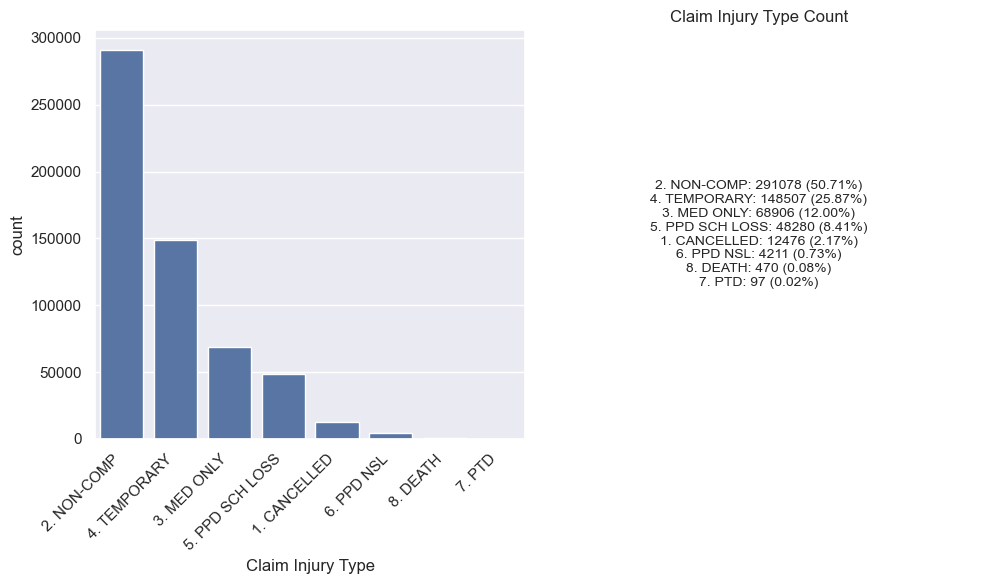

In [250]:
sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Vertical bar plot for Claim Injury Type counts on ax1
sns.countplot(x=train_data["Claim Injury Type"], order=train_data["Claim Injury Type"].value_counts().index, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Claim Injury Type counts and proportions
claim_counts = train_data["Claim Injury Type"].value_counts()
claim_proportions = train_data["Claim Injury Type"].value_counts(normalize=True) * 100

# Display text with counts and proportions on ax2
textstr = '\n'.join([f"{idx}: {val} ({prop:.2f}%)" for idx, val, prop in zip(claim_counts.index, claim_counts.values, claim_proportions.values)])
ax2.text(0.5, 0.5, textstr, ha='center', va='center', fontsize=10)
ax2.axis("off")

plt.title("Claim Injury Type Count")

plt.tight_layout()
plt.show()

50.71% of claims are categorized as "NON-COMP". 25.87% of claims are categorized as "TEMPORARY" and 12% of claims are categorized as "MED ONLY". Severe injuries like "PPD NSL" and "PTD", as well as "DEATH" are rare.

<a class="anchor" id="sub-section-4_2_2"></a>

### 4.2.2. Demographic: Gender

</a>

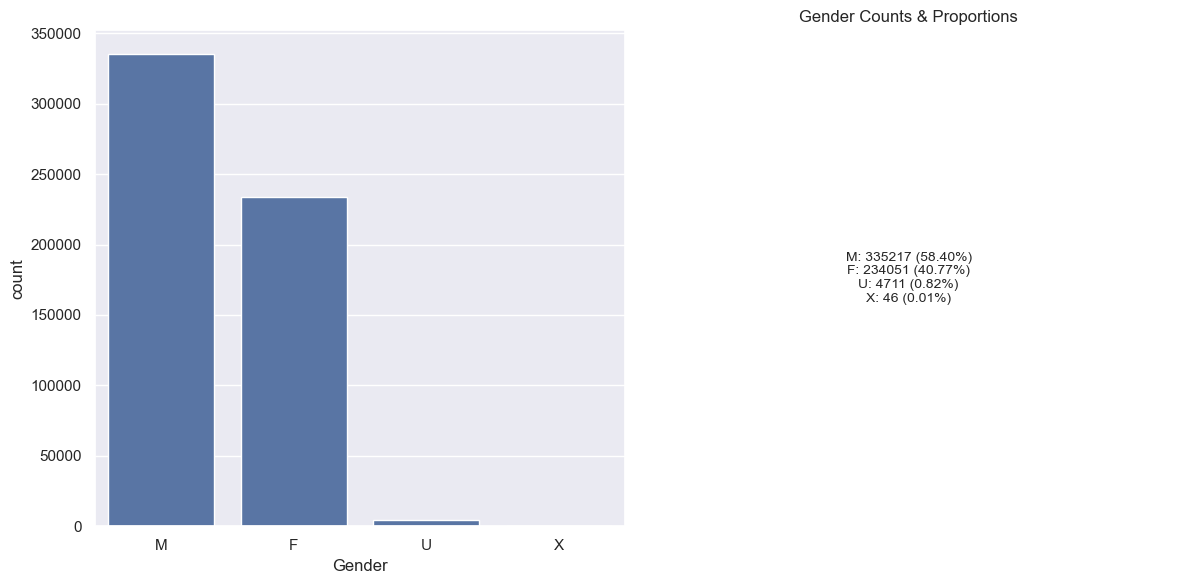

In [253]:
sns.set()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x=train_data["Gender"], ax=ax1)

# Gender counts and proportions
gender_counts = train_data["Gender"].value_counts()
gender_proportions = train_data["Gender"].value_counts(normalize=True) * 100

# Display text with counts and proportions on ax2
textstr = '\n'.join([f"{idx}: {val} ({prop:.2f}%)" for idx, val, prop in zip(gender_counts.index, gender_counts.values, gender_proportions.values)])
ax2.text(0.5, 0.5, textstr, ha='center', va='center', fontsize=10)
ax2.axis("off")

plt.title("Gender Counts & Proportions")

plt.tight_layout()
plt.show()

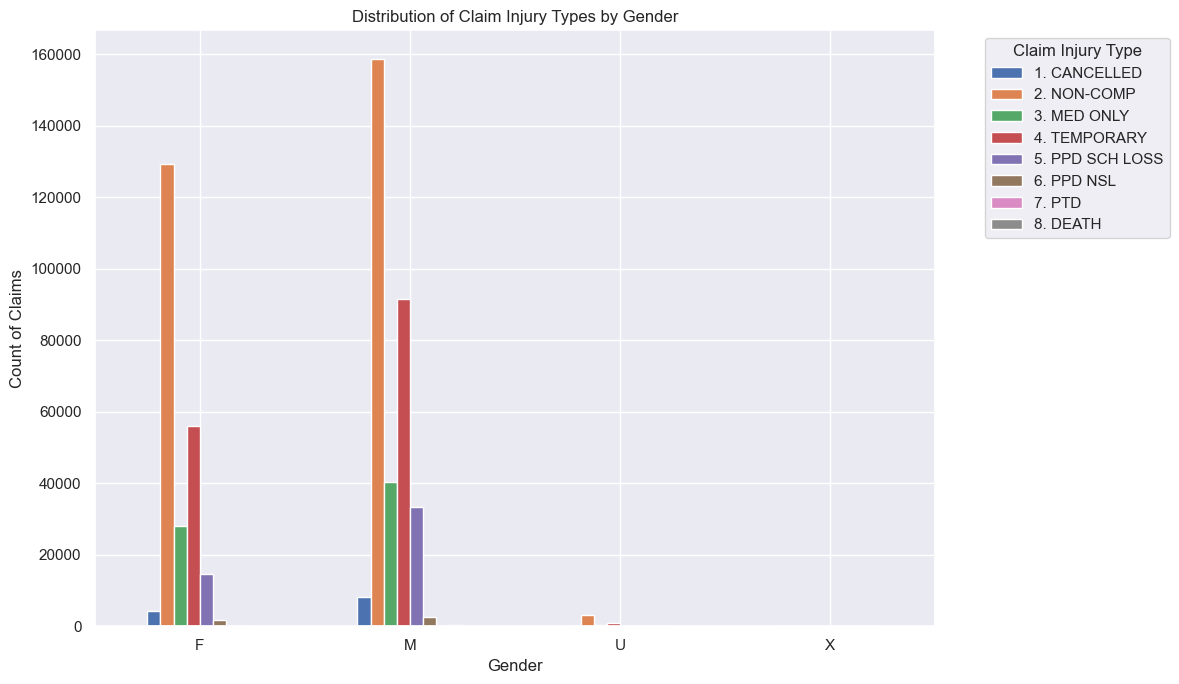

In [256]:
gender_claim_counts = train_data.groupby(["Gender", "Claim Injury Type"]).size().unstack()

# Create a bar plot
gender_claim_counts.plot(kind='bar', stacked=False, figsize=(12, 7), legend=False)
plt.ylabel("Count of Claims")
plt.tick_params(axis='x', rotation=0)

# Create legend & set it outside the plot
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Distribution of Claim Injury Types by Gender")

plt.tight_layout()
plt.show()

Across all gender categories, except for X, the most common Claim Injury Type is "NON-COMP", followed by "TEMPORARY". X has very very few counts.

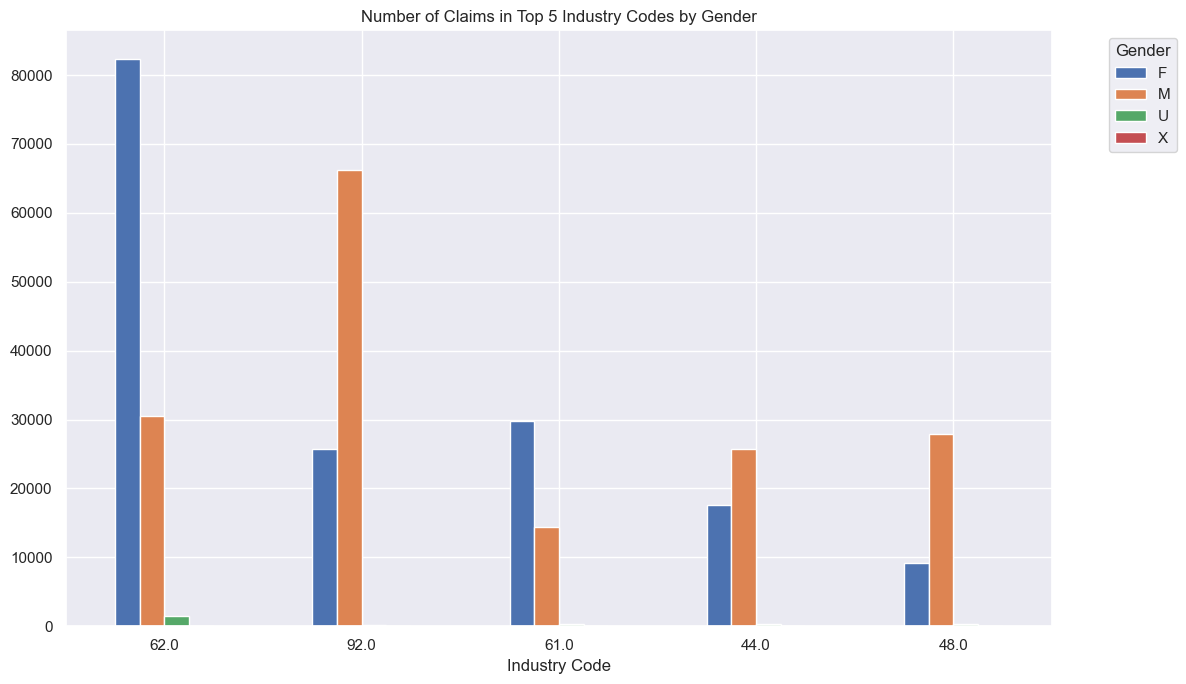

In [262]:
# Check Gender & Industry Code

sns.set()

# Get top 5 most recurring industry codes 
top_industry_codes = train_data["Industry Code"].value_counts().head(5).index

# Group by Industry Code and Gender, then count the occurrences
gender_industry_counts = train_data.groupby(["Industry Code", "Gender"]).size().unstack()
top_gender_industry = gender_industry_counts.loc[top_industry_codes]

# Plot the number of claims by gender for the top 5 industry codes
top_gender_industry.plot(kind='bar', stacked=False, figsize=(12, 7))
plt.tick_params(axis='x', rotation=0)

# Create a legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Number of Claims in Top 5 Industry Codes by Gender")

plt.tight_layout()
plt.show()

<a class="anchor" id="sub-section-4_2_3"></a>

### 4.2.3. Location: County of Injury, District Name, Medical Fee Region, & Zip Code

</a>

**County of Injury**

In [298]:
print(f"There is a total of {len(train_data['County of Injury'].value_counts())} counties in the data set.")

There is a total of 63 counties in the data set.


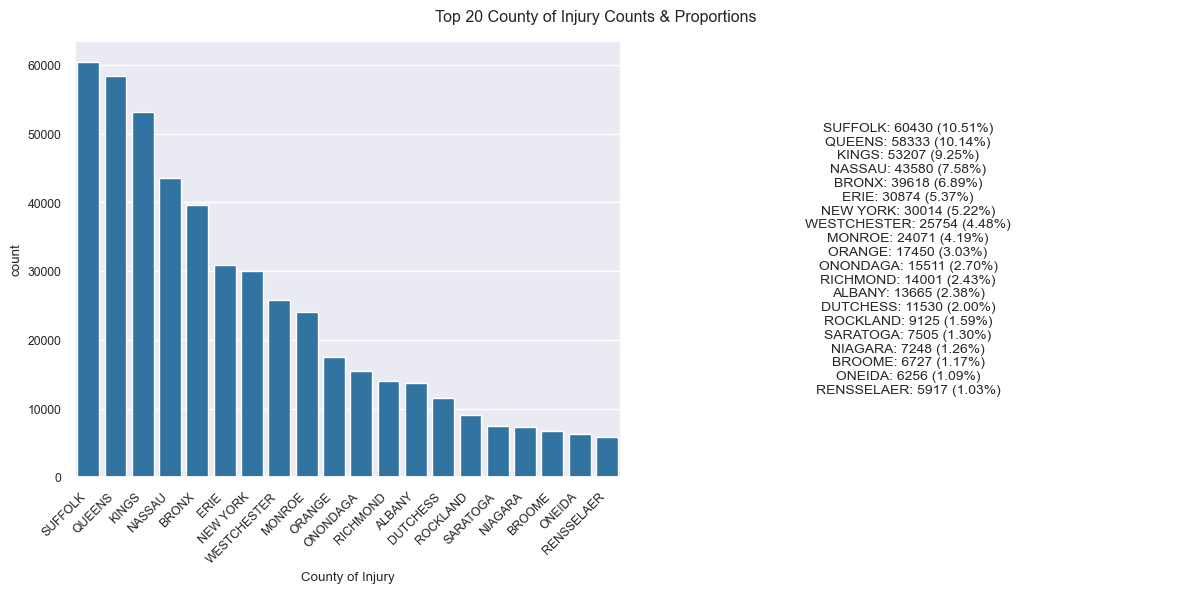

In [304]:
# Get the top 20 counties based on injury counts
top_20_counties = train_data["County of Injury"].value_counts().head(20).index
top_20_data = train_data[train_data["County of Injury"].isin(top_20_counties)]

# Create subplots
sns.set(font_scale=0.8)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Vertical count plot for top 20 counties
sns.countplot(x=top_20_data["County of Injury"], order=top_20_data["County of Injury"].value_counts().index, ax=ax1, color = sns.color_palette("tab10")[0])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=
                    45, ha='right')  # Rotate x-axis labels for better visibility

# Calculate counts and proportions
county_counts = top_20_data["County of Injury"].value_counts()
county_proportions = county_counts / len(train_data) * 100  # Proportions based on total data

# Prepare text for the second axis
textstr = '\n'.join([f"{idx}: {val} ({prop:.2f}%)" for idx, val, prop in zip(county_counts.index, county_counts.values, county_proportions.values)])
ax2.text(0.5, 0.5, textstr, ha='center', va='center', fontsize=10)
ax2.axis("off")

# Set title for the figure
title = "Top 20 County of Injury Counts & Proportions"
plt.suptitle(title)

plt.tight_layout()
plt.show()

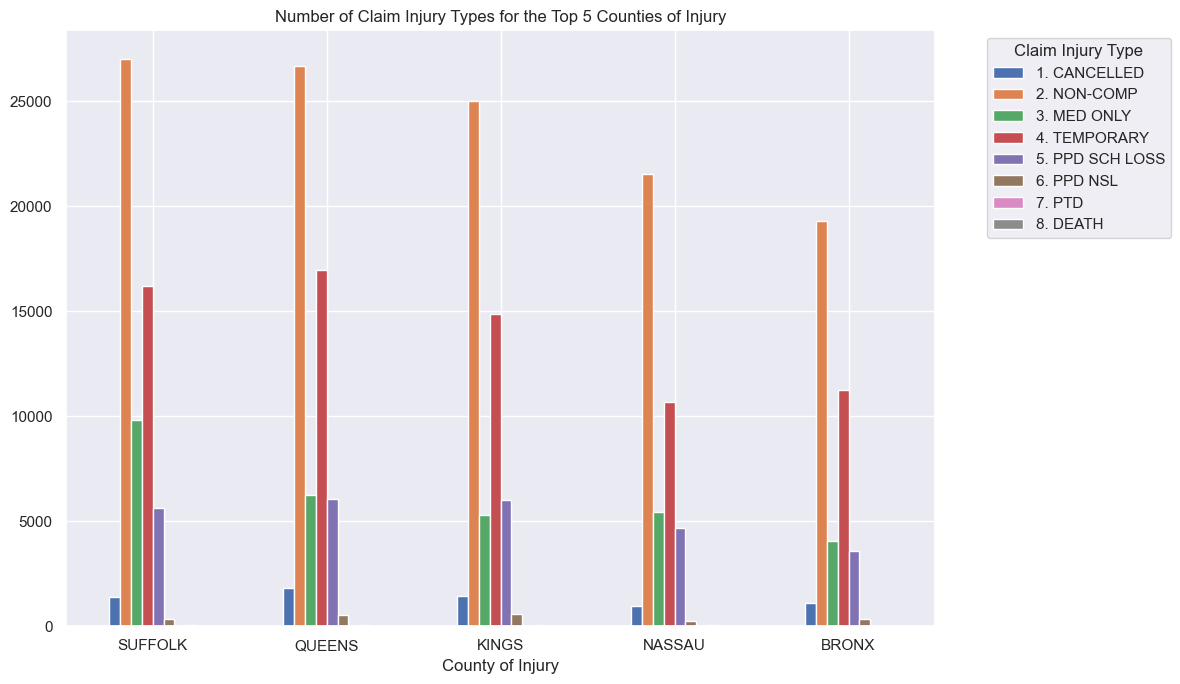

In [307]:
sns.set()

top_counties = train_data["County of Injury"].value_counts().head(5).index

# Grouping by Industry Code and Claim Injury Type, then counting
county_claim_counts = train_data.groupby(["County of Injury", "Claim Injury Type"]).size().unstack()
top_county_claim = county_claim_counts.loc[top_counties]

# Plot the number of claims by claim injury type for top 5 industry codes
top_county_claim.plot(kind="bar", stacked=False, legend=False, figsize=(12, 7))
plt.tick_params(axis='x', rotation=0)

# Create a legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Number of Claim Injury Types for the Top 5 Counties of Injury")

plt.tight_layout()
plt.show()

Except for Suffolk - Queens, Kings, Nassau and Bronx are all districts of NYC.

**District Name**

In [312]:
print(f"There is a total of {len(train_data['District Name'].value_counts())} district names in the data set.")

There is a total of 8 district names in the data set.


Claim Injury Type  1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
District Name                                                             
ALBANY                   1411.0      45170.0      11780.0       21269.0   
BINGHAMTON                271.0      11894.0       3654.0        4971.0   
BUFFALO                   878.0      23885.0       4618.0       11661.0   
HAUPPAUGE                1390.0      27018.0       9820.0       16209.0   
NYC                      7159.0     135380.0      28765.0       71601.0   
ROCHESTER                 544.0      23578.0       3770.0        9556.0   
STATEWIDE                 148.0       1205.0        435.0        1689.0   
SYRACUSE                  675.0      22948.0       6064.0       11551.0   

Claim Injury Type  5. PPD SCH LOSS  6. PPD NSL  7. PTD  8. DEATH  
District Name                                                     
ALBANY                      5923.0       528.0    22.0      68.0  
BINGHAMTON                   979.0        75.0  

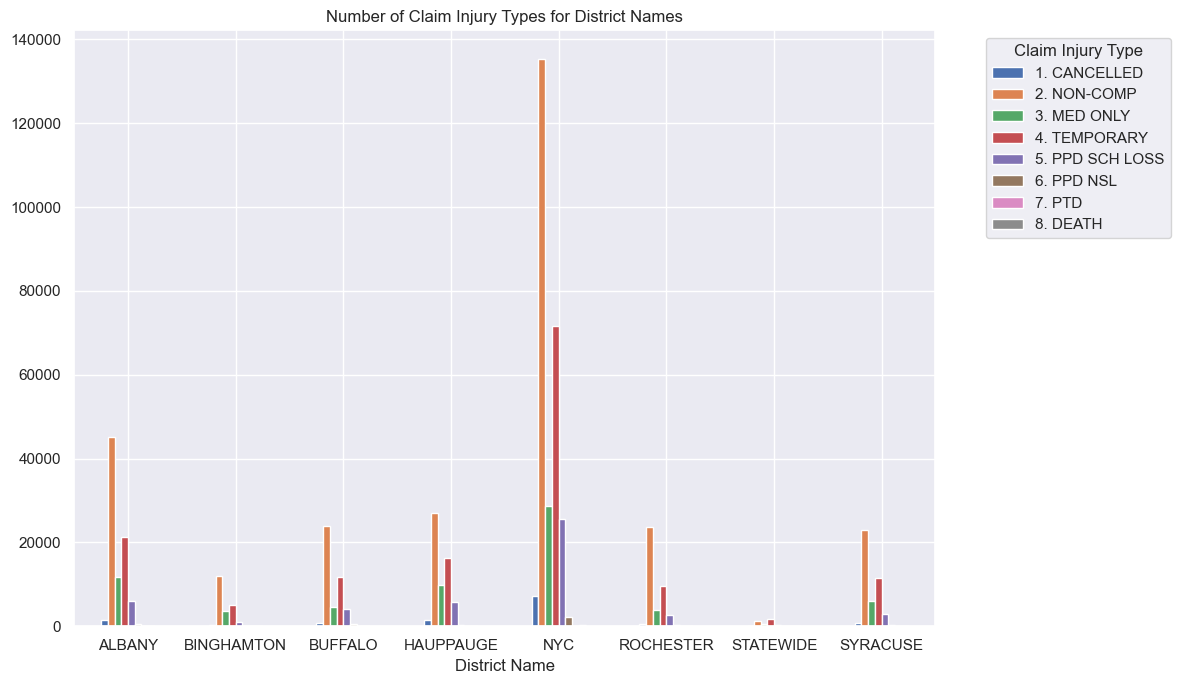

In [315]:
sns.set()

# Grouping by Industry Code and Claim Injury Type, then counting
district_name_claim_counts = train_data.groupby(["District Name", "Claim Injury Type"]).size().unstack()
print(district_name_claim_counts)

# Plot the number of claims by claim injury type for top 5 industry codes
district_name_claim_counts.plot(kind="bar", stacked=False, legend=False, figsize=(12, 7))
plt.tick_params(axis='x', rotation=0)

# Create a legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Number of Claim Injury Types for District Names")

plt.tight_layout()
plt.show()

Most claims are overseen in WBC's NYC office.

**Medical Fee Region**

In [330]:
print(f"There is a total of {len(train_data['Medical Fee Region'].value_counts())} medical fee regions in the data set.")

There is a total of 5 medical fee regions in the data set.


Claim Injury Type   1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
Medical Fee Region                                                         
I                           2059        73391        17432         32607   
II                          1339        45266        10217         21755   
III                         1203        27573         6799         13410   
IV                          6871       128904        31184         70843   
UK                          1004        15944         3274          9892   

Claim Injury Type   5. PPD SCH LOSS  6. PPD NSL  7. PTD  8. DEATH  
Medical Fee Region                                                 
I                              9441         821      24       110  
II                             5754         648      18        36  
III                            4286         324       6        53  
IV                            25866        2089      38       186  
UK                             2933         329      11    

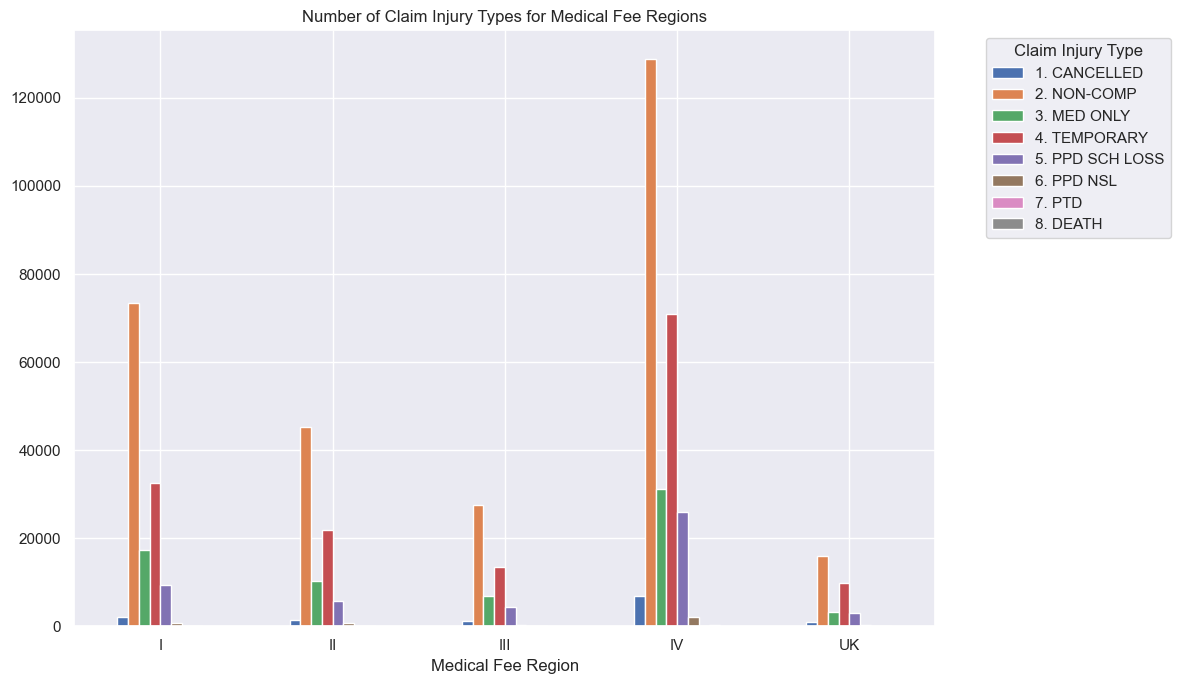

In [333]:
sns.set()

# Grouping by Industry Code and Claim Injury Type, then counting
medical_region_claim_counts = train_data.groupby(["Medical Fee Region", "Claim Injury Type"]).size().unstack()
print(medical_region_claim_counts)

# Plot the number of claims by claim injury type for top 5 industry codes
medical_region_claim_counts.plot(kind="bar", stacked=False, legend=False, figsize=(12, 7))
plt.tick_params(axis='x', rotation=0)

# Create a legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Number of Claim Injury Types for Medical Fee Regions")

plt.tight_layout()
plt.show()

**Zip Code**

In [336]:
zip_code_count_value_counts = len(train_data['Zip Code'].value_counts())
zip_code_count_unique = len(train_data['Zip Code'].dropna().unique())
missing_zip_codes = train_data['Zip Code'].isna().sum()

print(f"There is a total of {zip_code_count_value_counts} zip codes in the data set.")
print(f"There are {zip_code_count_unique} unique zip codes in the data set (excluding NaN).")
print(f"There are {missing_zip_codes} missing values in the Zip Code column.")

There is a total of 10060 zip codes in the data set.
There are 10060 unique zip codes in the data set (excluding NaN).
There are 29733 missing values in the Zip Code column.


<a class="anchor" id="sub-section-4_2_4"></a>

### 4.2.4. Injury Information: WCIO Codes & COVID-19

</a>

**WCIO Codes**

In [350]:
code_count1 = len(train_data["WCIO Cause of Injury Code"].value_counts())
code_count2 = len(train_data["WCIO Nature of Injury Code"].value_counts())
code_count3 = len(train_data["WCIO Part Of Body Code"].value_counts())

print(f"There are {code_count1} codes in WCIO Cause of Injury Code.")
print(f"There are {code_count2} codes in WCIO Nature of Injury Code.")
print(f"There are {code_count2} codes in WCIO Part Of Body Code.")

There are 77 codes in WCIO Cause of Injury Code.
There are 56 codes in WCIO Nature of Injury Code.
There are 56 codes in WCIO Part Of Body Code.


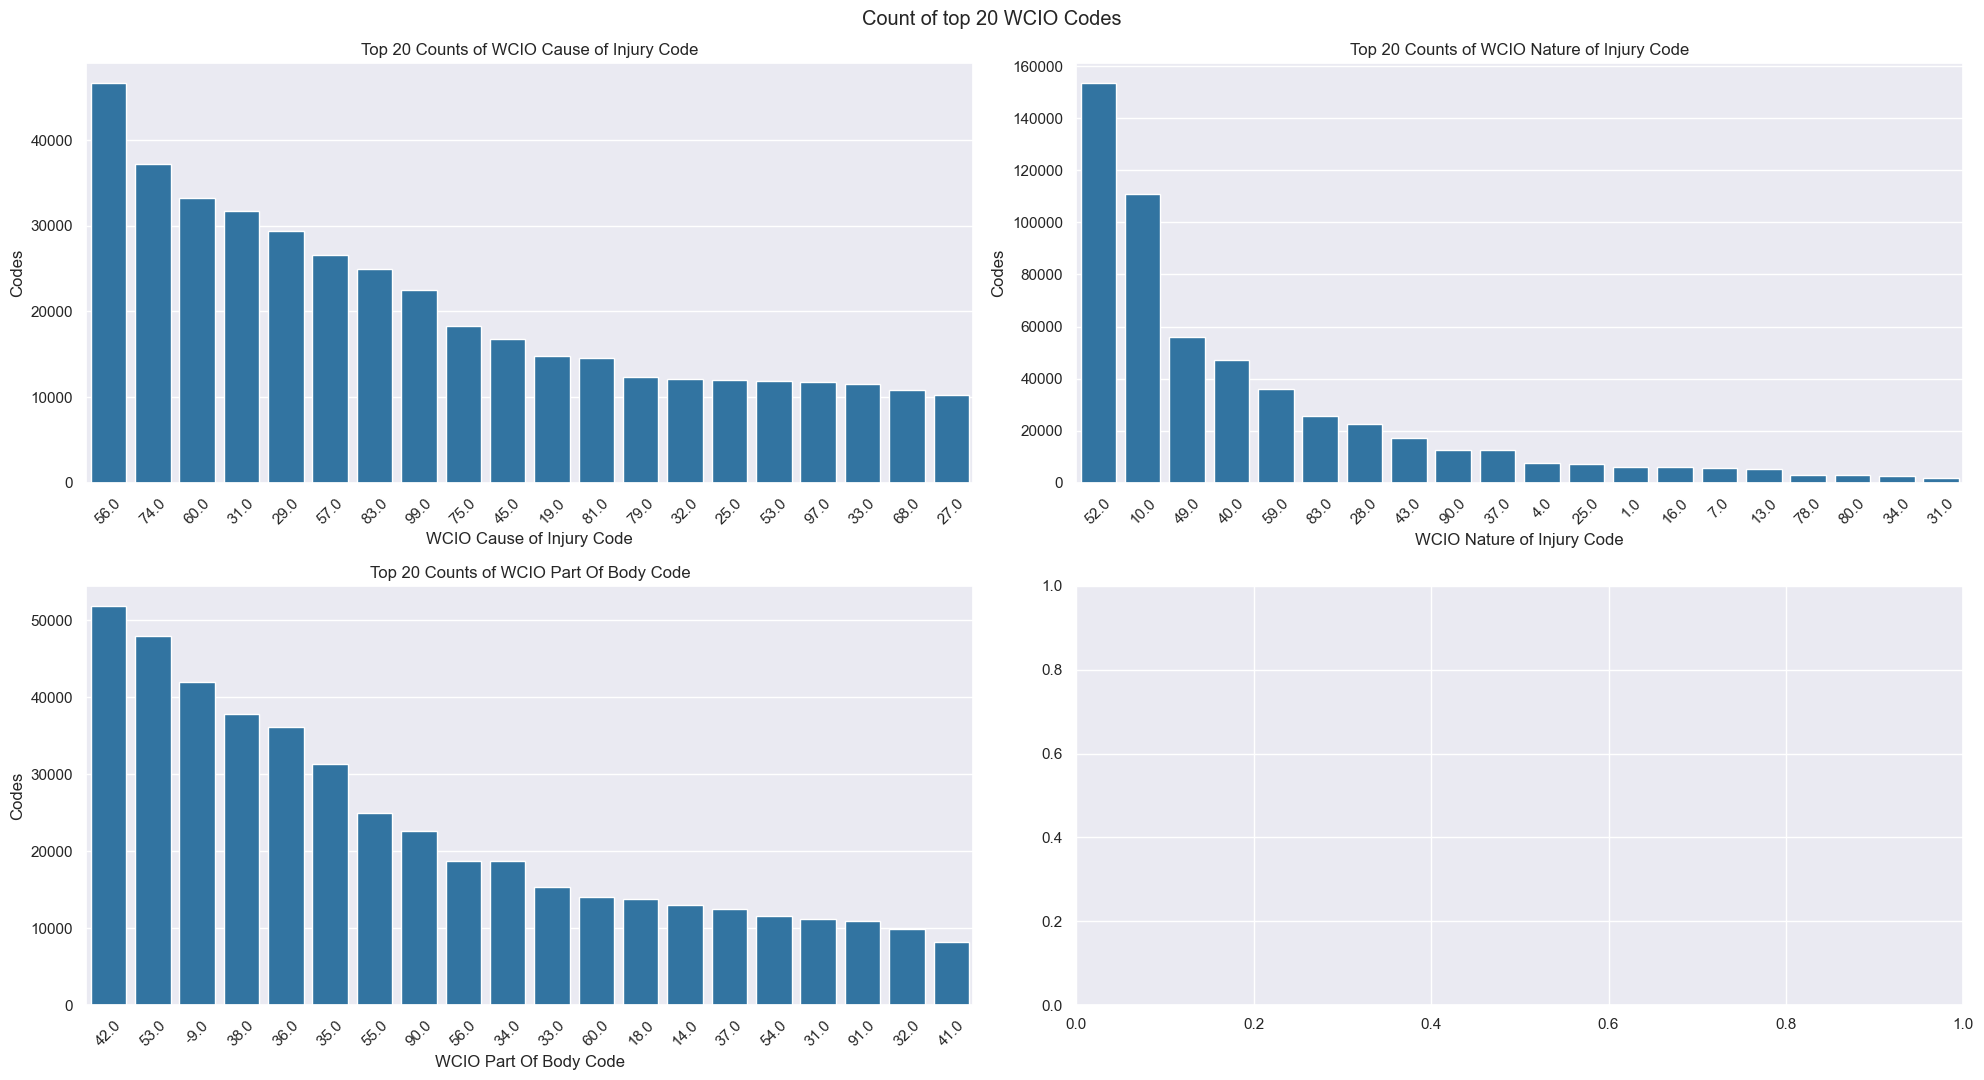

In [353]:
# Define the WCIO codes to analyze
wcio_codes = ["WCIO Cause of Injury Code", "WCIO Nature of Injury Code", "WCIO Part Of Body Code"]

sns.set()
top_n = 20 # Define the number of top categories to display for the codes
fig, axes = plt.subplots(2, 2, figsize=(20, 11))

# Iterate over each subplot axis and WCIO code to plot the data 
for ax, feat in zip(axes.flatten(), wcio_codes):
    # Get the top 20 codes with the most counts from the current WCIO code 
    top_categories = train_data[feat].value_counts().nlargest(top_n)

    # Plot a barplot of the top categories for the current WCIO code
    sns.barplot(x=top_categories.index,
                y=top_categories.values,
                ax=ax,
                order=top_categories.index,
                color = sns.color_palette("tab10")[0])
    
    ax.set_title(f"Top {top_n} Counts of {feat}")
    ax.set_xlabel(feat)
    ax.set_ylabel("Codes")
    ax.tick_params(axis='x', rotation=45)

title = "Count of top 20 WCIO Codes"
plt.suptitle(title)

plt.tight_layout()
plt.show()

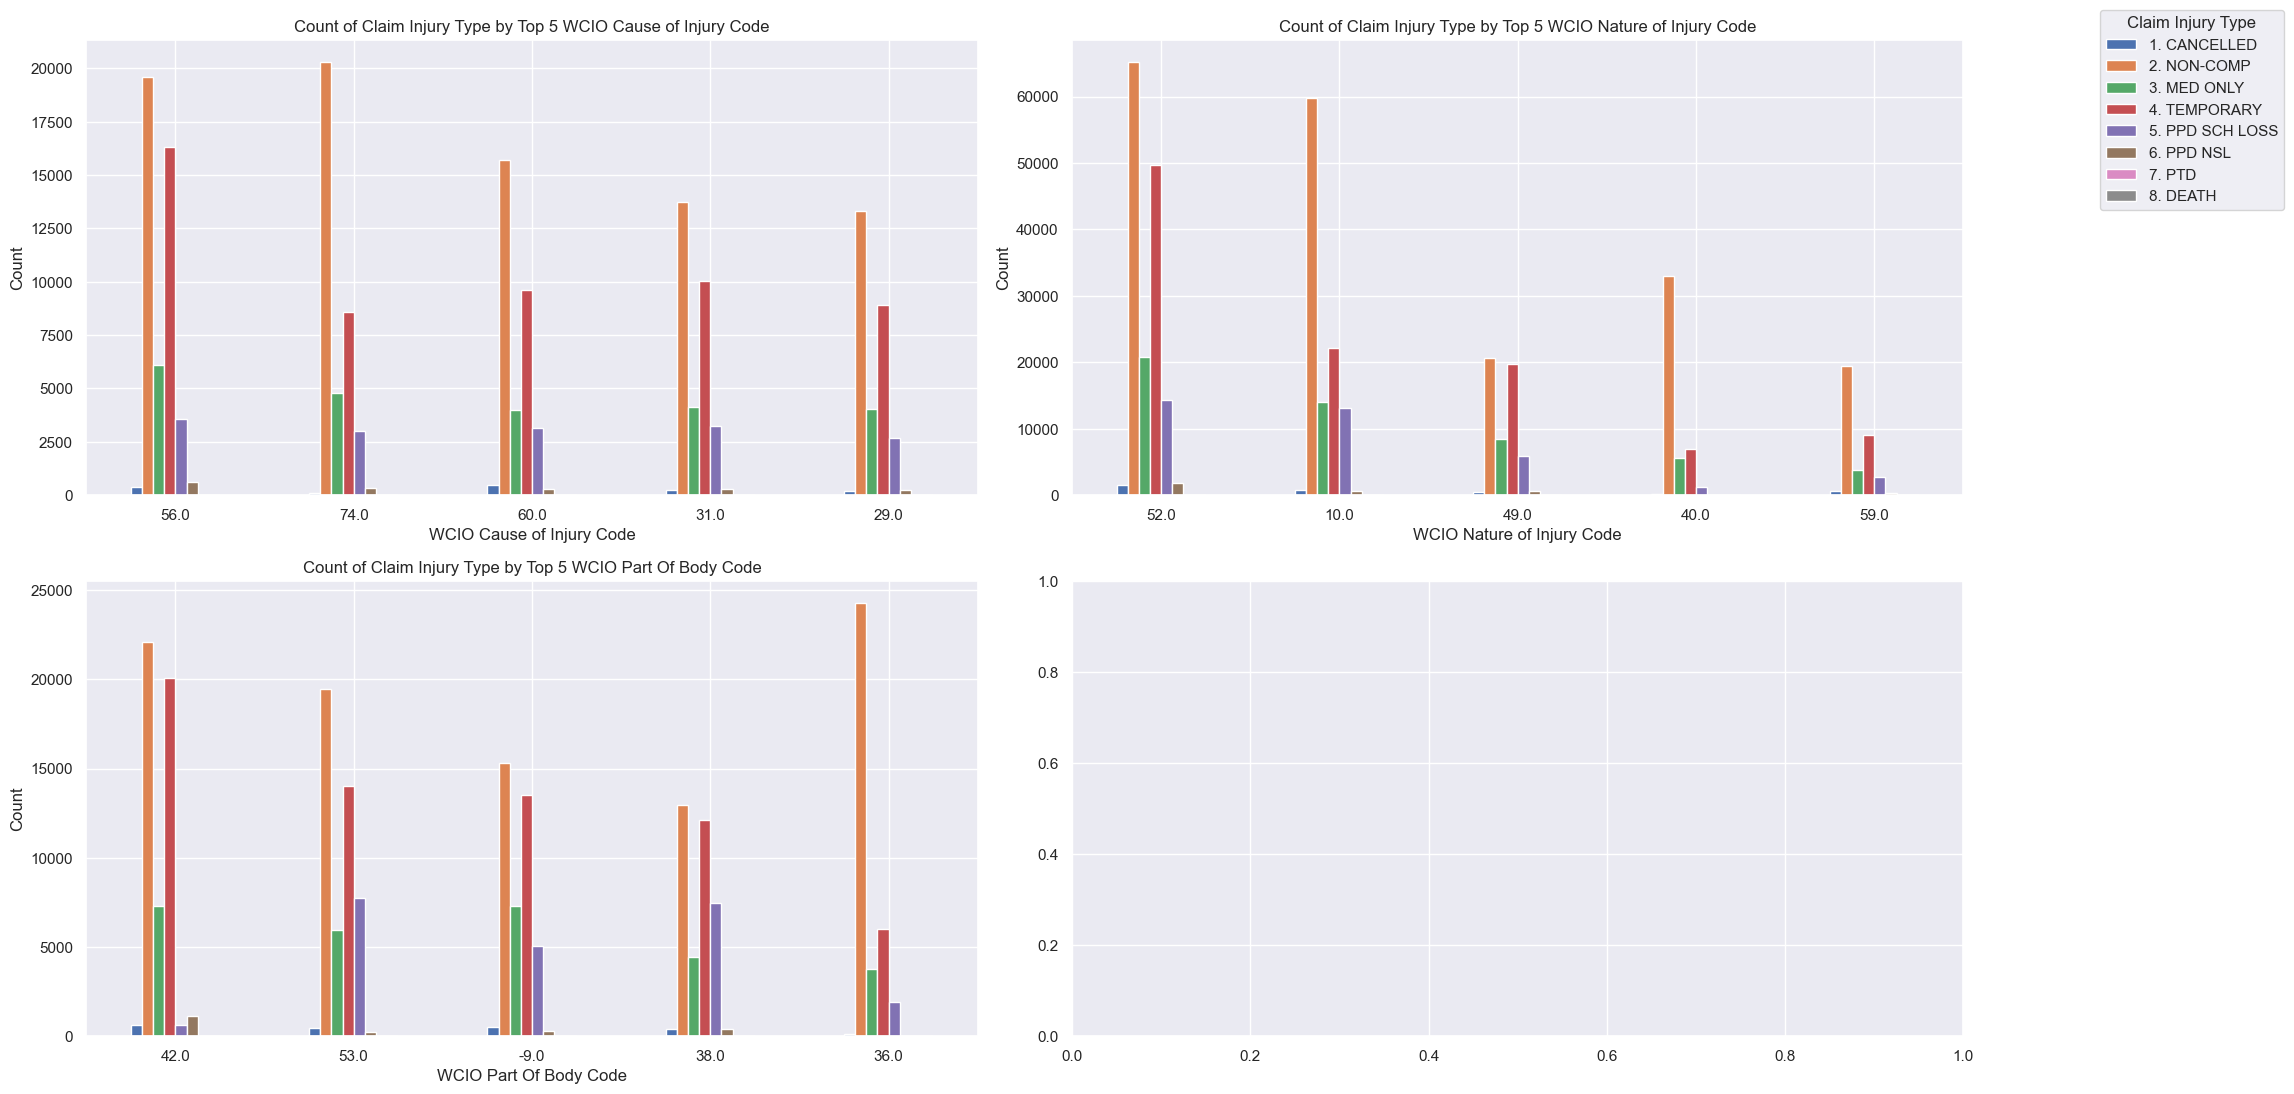

In [356]:
sns.set(font_scale=1)
fig, axes = plt.subplots(2, 2, figsize=(20, 11))

# Iterate over each subplot axis and WCIO code to plot the data 
for ax, feat in zip(axes.flatten(), wcio_codes):
    # Get the top 5 codes with the most counts for the current WCIO feature
    top_codes = train_data[feat].value_counts().head(5).index

    # Group by the feature and Claim Injury Type and get counts
    counts = train_data[train_data[feat].isin(top_codes)].groupby([feat, "Claim Injury Type"]).size().unstack()
    # Reorder the data to ensure it matches the order of top codes in the plot
    top_codes_counts = counts.reindex(index=top_codes)

    # Plot the counts
    top_codes_counts.plot(kind="bar", stacked=False, ax=ax, legend=False)
    ax.set_title(f"Count of Claim Injury Type by Top 5 {feat}")
    ax.set_xlabel(feat)
    ax.tick_params(axis='x', rotation=0)
    ax.set_ylabel("Count")

# Legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**COVID-19**

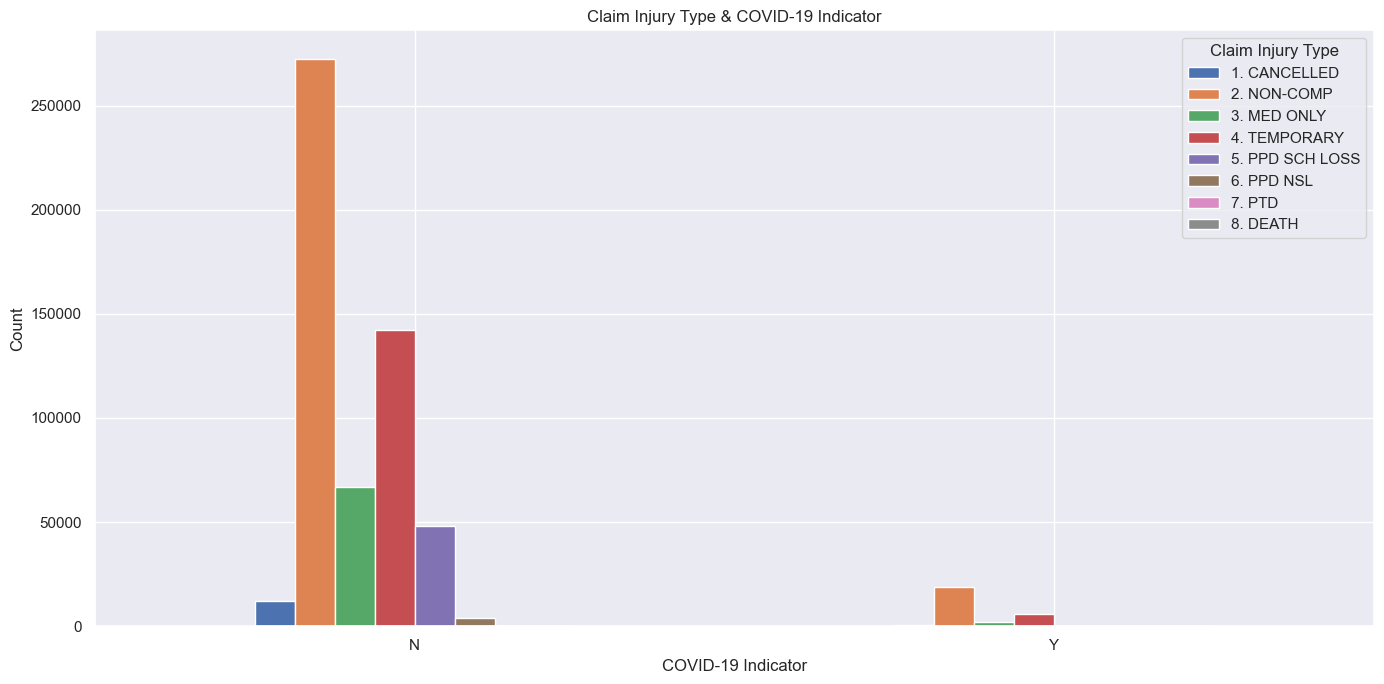

In [362]:
# Group the data by COVID-19 Indicator & Claim Injury Type, then count occurrences for each combination
injury_type_claim_covid_counts = train_data.groupby(["COVID-19 Indicator", "Claim Injury Type"]).size().unstack()

injury_type_claim_covid_counts.plot(kind="bar", stacked=False, figsize=(14, 7))
plt.ylabel("Count")
plt.tick_params(axis='x', rotation=0)

plt.title("Claim Injury Type & COVID-19 Indicator")

plt.tight_layout()
plt.show()

<a class="anchor" id="sub-section-4_2_5"></a>

### 4.2.5. Claim Information and Processing: Attorney Representative, Agreement Reached, WCB Decision

</a>

**Attorney Representative**

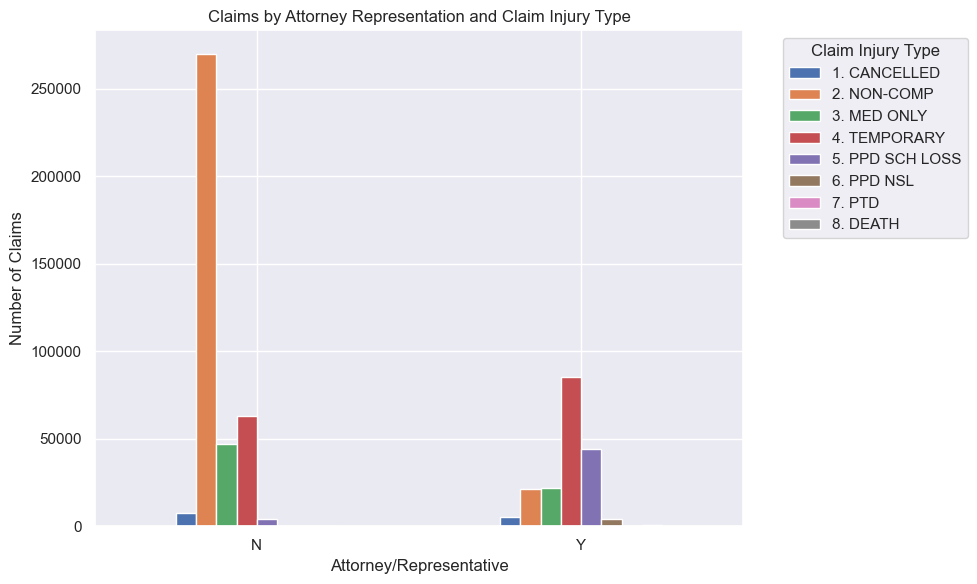

In [375]:
fig, ax = plt.subplots(figsize=(10, 6))

# Group the data by Attorney/Representative & Claim Injury Type
# Count occurrences for each combination
attorney_counts = train_data.groupby(["Attorney/Representative", "Claim Injury Type"]).size().unstack()

attorney_counts.plot(kind="bar", stacked=False, ax=ax)
plt.ylabel("Number of Claims")
plt.xticks(rotation=0)

plt.legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Claims by Attorney Representation and Claim Injury Type")

plt.tight_layout()
plt.show()

**Agreement Reached**

In [378]:
train_data['Agreement Reached'].value_counts()

Agreement Reached
0.0    547238
1.0     26787
Name: count, dtype: int64

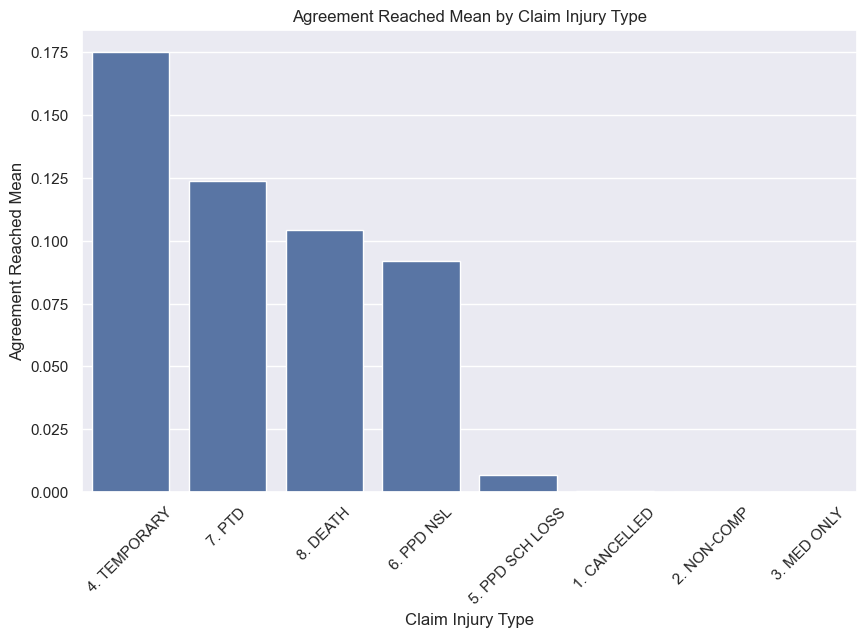

In [406]:
plt.figure(figsize=(10, 6))

# Group the data by Claim Injury Type and calculate the mean of 'Agreement Reached' for each injury type
# Sort the results in descending order
sorted_claims = train_data.groupby('Claim Injury Type')['Agreement Reached'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=sorted_claims, x='Claim Injury Type', y='Agreement Reached')
plt.ylabel('Agreement Reached Mean')
plt.xticks (rotation = 45)

plt.title('Agreement Reached Mean by Claim Injury Type')

plt.show()

Claim Injury Type  1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
Agreement Reached                                                         
0.0                     12472.0     291078.0      68906.0      122490.0   
1.0                         4.0          NaN          NaN       26017.0   

Claim Injury Type  5. PPD SCH LOSS  6. PPD NSL  7. PTD  8. DEATH  
Agreement Reached                                                 
0.0                        47962.0      3824.0    85.0     421.0  
1.0                          318.0       387.0    12.0      49.0  


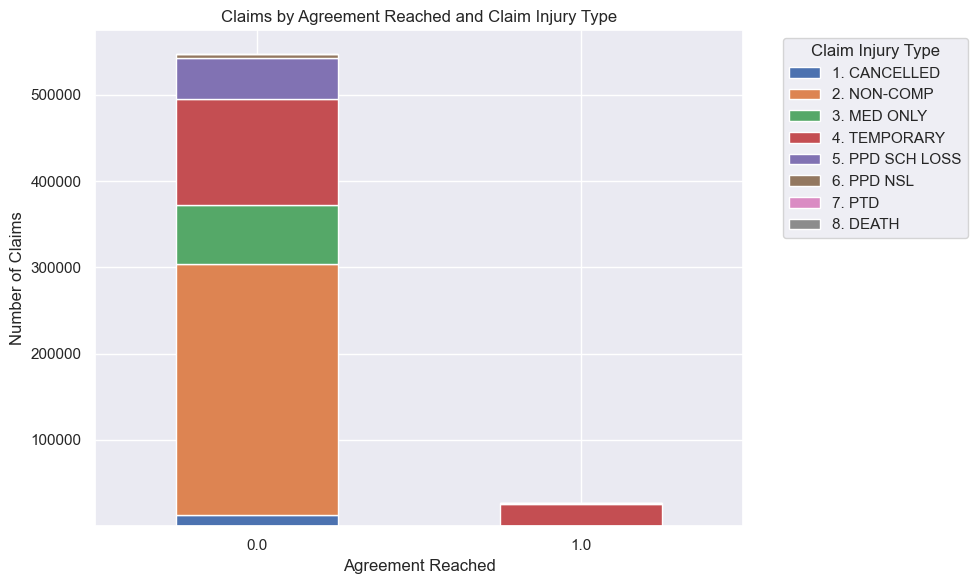

In [382]:
fig, ax = plt.subplots(figsize=(10, 6))

# Group the data by Attorney/Representative & Claim Injury Type
# Count occurrences for each combination
attorney_counts = train_data.groupby(["Agreement Reached", "Claim Injury Type"]).size().unstack()
print(attorney_counts)

attorney_counts.plot(kind="bar", stacked=True, ax=ax)
plt.ylabel("Number of Claims")
plt.xticks(rotation=0)

plt.legend(title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Claims by Agreement Reached and Claim Injury Type")

plt.tight_layout()
plt.show()

In [384]:
rep_and_agreement = train_data[(train_data['Attorney/Representative'] == 'Y') & (train_data['Agreement Reached'] == 1.0)]

print(f"There are {len(rep_and_agreement)} cases where an attorney/ representative was present and an agreement was reached.")

There are 24538 cases where an attorney/ representative was present and an agreement was reached.


In [409]:
rep_and_agreement['Claim Injury Type'].value_counts()

Claim Injury Type
4. TEMPORARY       23784
6. PPD NSL           384
5. PPD SCH LOSS      307
8. DEATH              47
7. PTD                12
1. CANCELLED           4
Name: count, dtype: int64

Most claims with an attorney representative are classified as temporary injuries, suggesting that legal representation may facilitate compensation. A total of 547,238 claims did not reach an agreement, while 26,787 did, with a significant majority (24,535) involving an attorney.

**WCB Decision**

WCB Decision
Not Work Related    574025
Name: count, dtype: int64


<Figure size 1200x700 with 0 Axes>

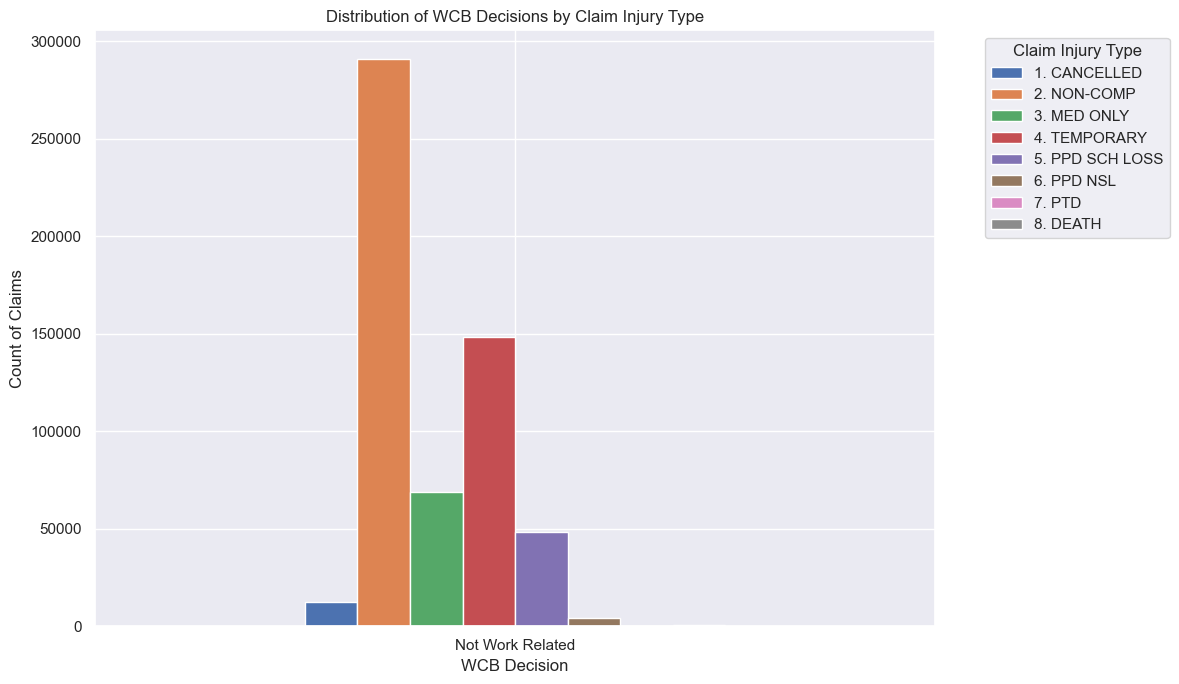

In [416]:
plt.figure(figsize=(12, 7))

# Group the data by 'WCB Decision' and 'Claim Injury Type' to count occurrences of each combination
injury_decision_counts = train_data.groupby(['WCB Decision', 'Claim Injury Type']).size().unstack()

print(train_data["WCB Decision"].value_counts())

injury_decision_counts.plot(kind='bar', stacked=False, figsize=(12, 7))
plt.xlabel('WCB Decision')
plt.ylabel('Count of Claims')
plt.xticks(rotation=0)

plt.legend(title='Claim Injury Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of WCB Decisions by Claim Injury Type')

plt.tight_layout()
plt.show()

<a class="anchor" id="sub-section-4_2_6"></a>

### 4.2.6. Employment/Work Context: Industry Code, Carrier Name, Carrier Type, Alternative Dispute Resolution

</a>

**Industry Code**

In [441]:
industry_code_count = len(train_data["Industry Code"].value_counts())

print(f"There are {industry_code_count} codes in Injury Code.")

There are 24 codes in Injury Code.


In [443]:
# Get the top 10 codes and their counts for industry code
top_10_industry_codes = train_data['Industry Code'].value_counts().nlargest(10)

# Convert top_10_industry_codes series to a dataframe and reset index
top_industry_df = pd.DataFrame(top_10_industry_codes).reset_index()
# Name columns
top_industry_df.columns = ['Industry Code', 'Count']
# Merge 'Industry Code' and 'Industry Code Description' to top_cause_df dropping duplicates
top_industry_df = top_industry_df.merge(train_data[['Industry Code', 'Industry Code Description']].drop_duplicates())
top_industry_df

,Industry Code,Count,Industry Code Description
0,62.0,114339,HEALTH CARE AND SOCIAL ASSISTANCE
1,92.0,92240,PUBLIC ADMINISTRATION
2,61.0,44393,EDUCATIONAL SERVICES
3,44.0,43685,RETAIL TRADE
4,48.0,37319,TRANSPORTATION AND WAREHOUSING
5,23.0,30903,CONSTRUCTION
6,72.0,26456,ACCOMMODATION AND FOOD SERVICES
7,56.0,21027,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...
8,45.0,17953,RETAIL TRADE
9,33.0,17232,MANUFACTURING


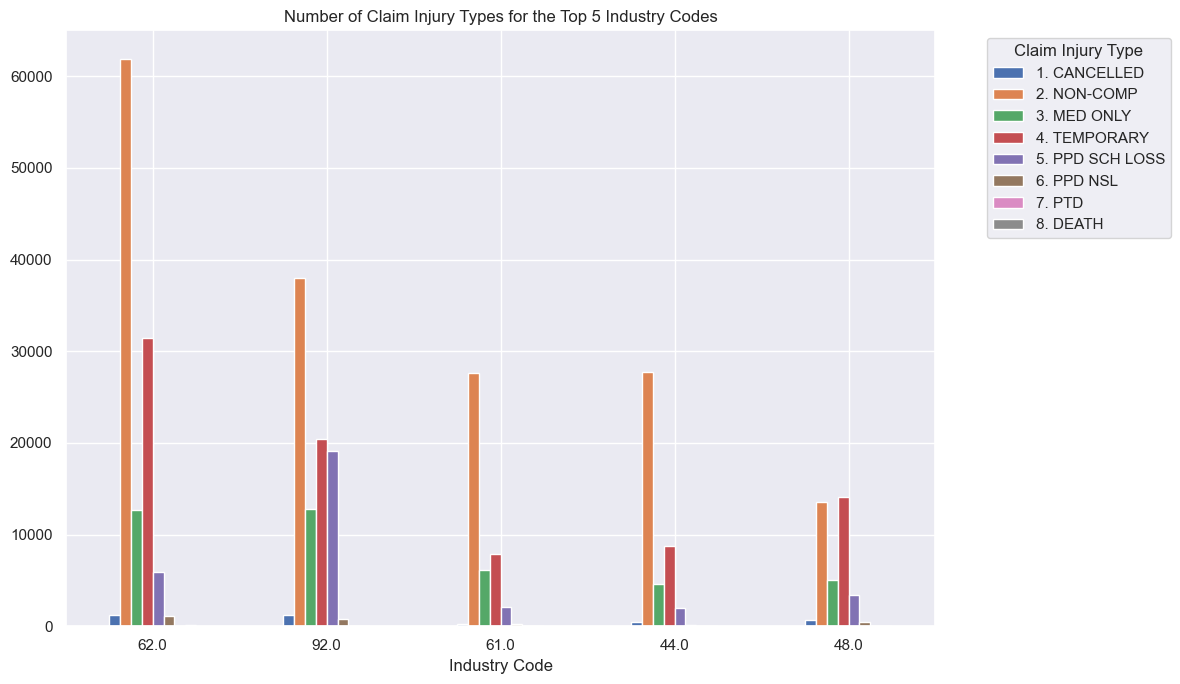

In [444]:
sns.set()

top_industry_codes = train_data["Industry Code"].value_counts().head(5).index

# Grouping by Industry Code and Claim Injury Type, then counting
industry_claim_counts = train_data.groupby(["Industry Code", "Claim Injury Type"]).size().unstack()
top_industry_claim = industry_claim_counts.loc[top_industry_codes]

# Plot the number of claims by claim injury type for top 5 industry codes
top_industry_claim.plot(kind="bar", stacked=False, legend=False, figsize=(12, 7))
plt.tick_params(axis='x', rotation=0)

# Create a legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Number of Claim Injury Types for the Top 5 Industry Codes")

plt.tight_layout()
plt.show()

**Carrier Name**

In [450]:
carrier_name_count = len(train_data["Carrier Name"].value_counts())

print(f"There are {carrier_name_count} Carrier Names.")

There are 2046 Carrier Names.


Claim Injury Type             1. CANCELLED  2. NON-COMP  3. MED ONLY  \
Carrier Name                                                           
STATE INSURANCE FUND                2567.0      43593.0      16312.0   
POLICE, FIRE, SANITATION             600.0       6466.0       2670.0   
AMERICAN ZURICH INSURANCE CO         426.0       9345.0       2132.0   
CHARTER OAK FIRE INS CO              292.0       9104.0       1376.0   
INDEMNITY INS. OF N AMERICA          224.0       7943.0       1782.0   

Claim Injury Type             4. TEMPORARY  5. PPD SCH LOSS  6. PPD NSL  \
Carrier Name                                                              
STATE INSURANCE FUND               37643.0           9694.0      1139.0   
POLICE, FIRE, SANITATION            1837.0           9889.0       123.0   
AMERICAN ZURICH INSURANCE CO        4641.0            850.0       138.0   
CHARTER OAK FIRE INS CO             4941.0           1333.0       115.0   
INDEMNITY INS. OF N AMERICA         3487.0   

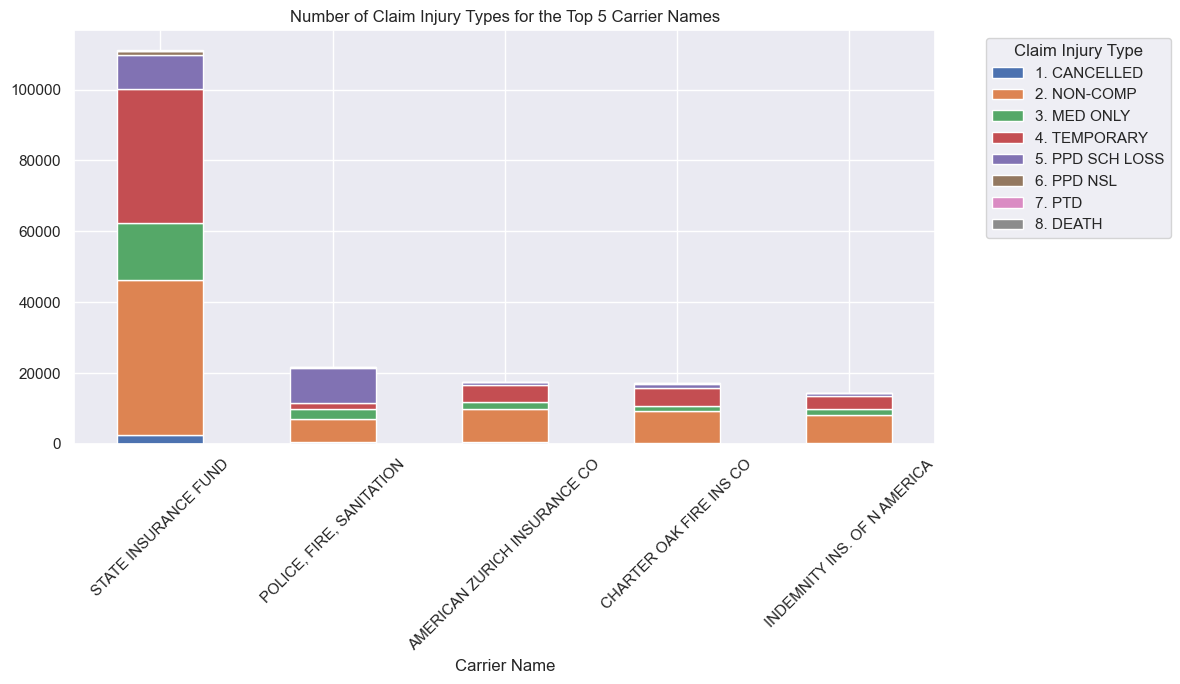

In [453]:
sns.set()

top_carrier_name = train_data["Carrier Name"].value_counts().head(5).index

# Grouping by Carrier Name and Claim Injury Type, then counting
carrier_name_claim_counts = train_data.groupby(["Carrier Name", "Claim Injury Type"]).size().unstack()
top_carrier_name_claim = carrier_name_claim_counts.loc[top_carrier_name]

print(top_carrier_name_claim)

# Plot the number of claims by claim injury type for top 5 industry codes
top_carrier_name_claim.plot(kind="bar", stacked=True, legend=False, figsize=(12, 7))
plt.tick_params(axis='x', rotation=45)

# Create a legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Number of Claim Injury Types for the Top 5 Carrier Names")

plt.tight_layout()
plt.show()

STATE INSURANCE FUND handles the highest number of claims across all types, with particularly high counts for TEMPORARY and NON-COMP.

**Carrier Type**

In [458]:
carrier_type_count = len(train_data["Carrier Type"].value_counts())

print(f"There are {carrier_type_count} Carrier Types.")

There are 8 Carrier Types.


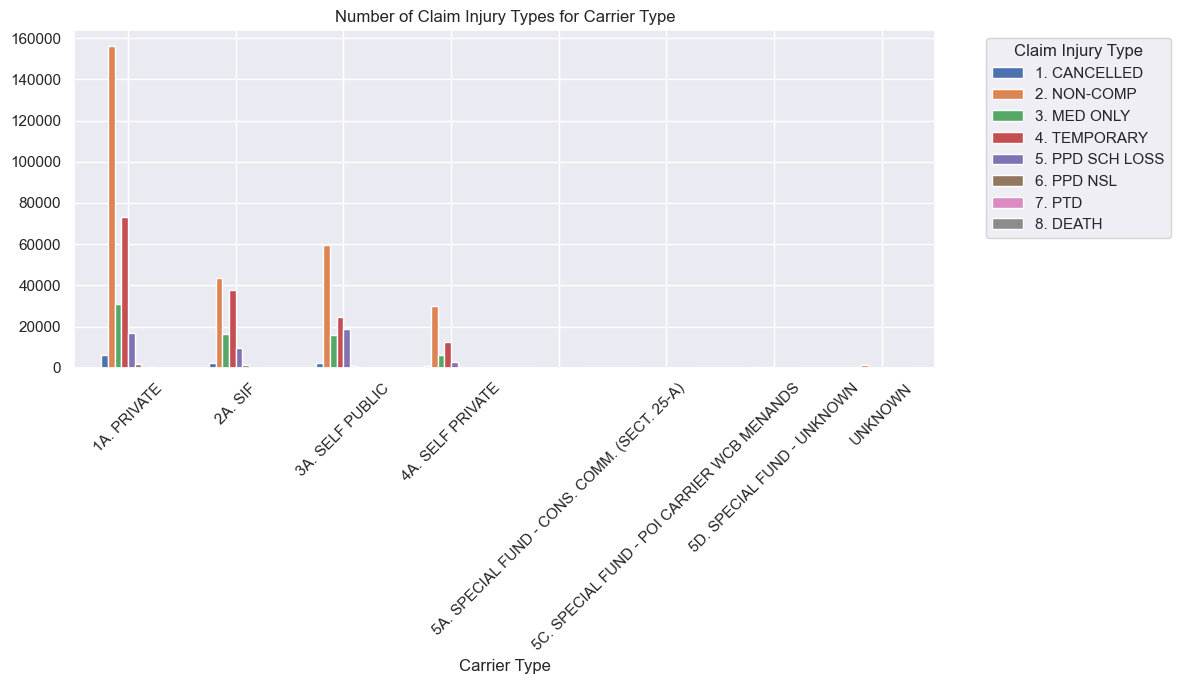

In [462]:
sns.set()
carrier_type_claim_counts = train_data.groupby(["Carrier Type", "Claim Injury Type"]).size().unstack()

# Plot the number of claims by claim injury type for top 5 industry codes
carrier_type_claim_counts.plot(kind="bar", stacked=False, legend=False, figsize=(12, 7))
plt.tick_params(axis='x', rotation=45)

# Create a legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Number of Claim Injury Types for Carrier Type")

plt.tight_layout()
plt.show()

**Alternative Dispute Resolution**

In [485]:
train_data["Alternative Dispute Resolution"].value_counts()

Alternative Dispute Resolution
N    571411
Y      2609
U         5
Name: count, dtype: int64

Claim Injury Type               1. CANCELLED  2. NON-COMP  3. MED ONLY  \
Alternative Dispute Resolution                                           
N                                    12457.0     288483.0      68906.0   
U                                        NaN          5.0          NaN   
Y                                       19.0       2590.0          NaN   

Claim Injury Type               4. TEMPORARY  5. PPD SCH LOSS  6. PPD NSL  \
Alternative Dispute Resolution                                              
N                                   148507.0          48280.0      4211.0   
U                                        NaN              NaN         NaN   
Y                                        NaN              NaN         NaN   

Claim Injury Type               7. PTD  8. DEATH  
Alternative Dispute Resolution                    
N                                 97.0     470.0  
U                                  NaN       NaN  
Y                                  NaN 

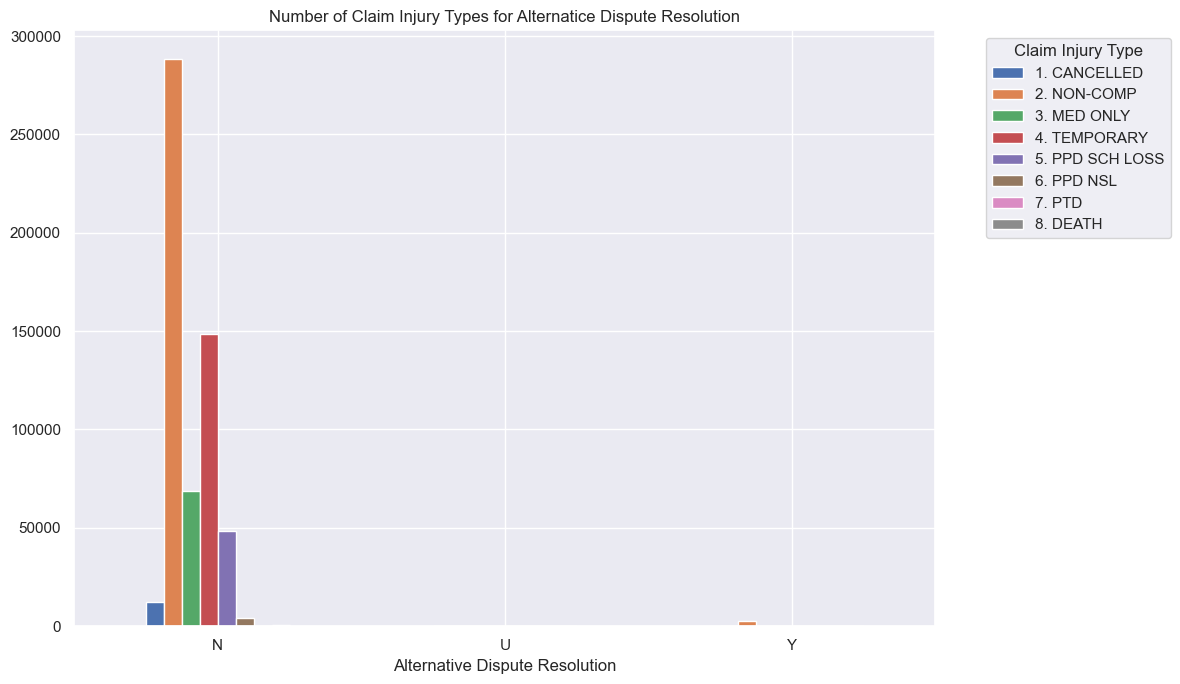

In [488]:
sns.set()

alternative_dispute_res_counts = train_data.groupby(["Alternative Dispute Resolution", "Claim Injury Type"]).size().unstack()

print(alternative_dispute_res_counts)

# Plot the number of claims by claim injury type for top 5 industry codes
alternative_dispute_res_counts.plot(kind="bar", stacked=False, legend=False, figsize=(12, 7))
plt.tick_params(axis='x', rotation=0)

# Create a legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, title="Claim Injury Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Number of Claim Injury Types for Alternatice Dispute Resolution")

plt.tight_layout()
plt.show()

<a class="anchor" id="sub-section-4_3"></a>

## 4.3. Numerical Variables Exploration

</a>

<a class="anchor" id="sub-section-4_3_1"></a>

### 4.3.1. Overview

</a>

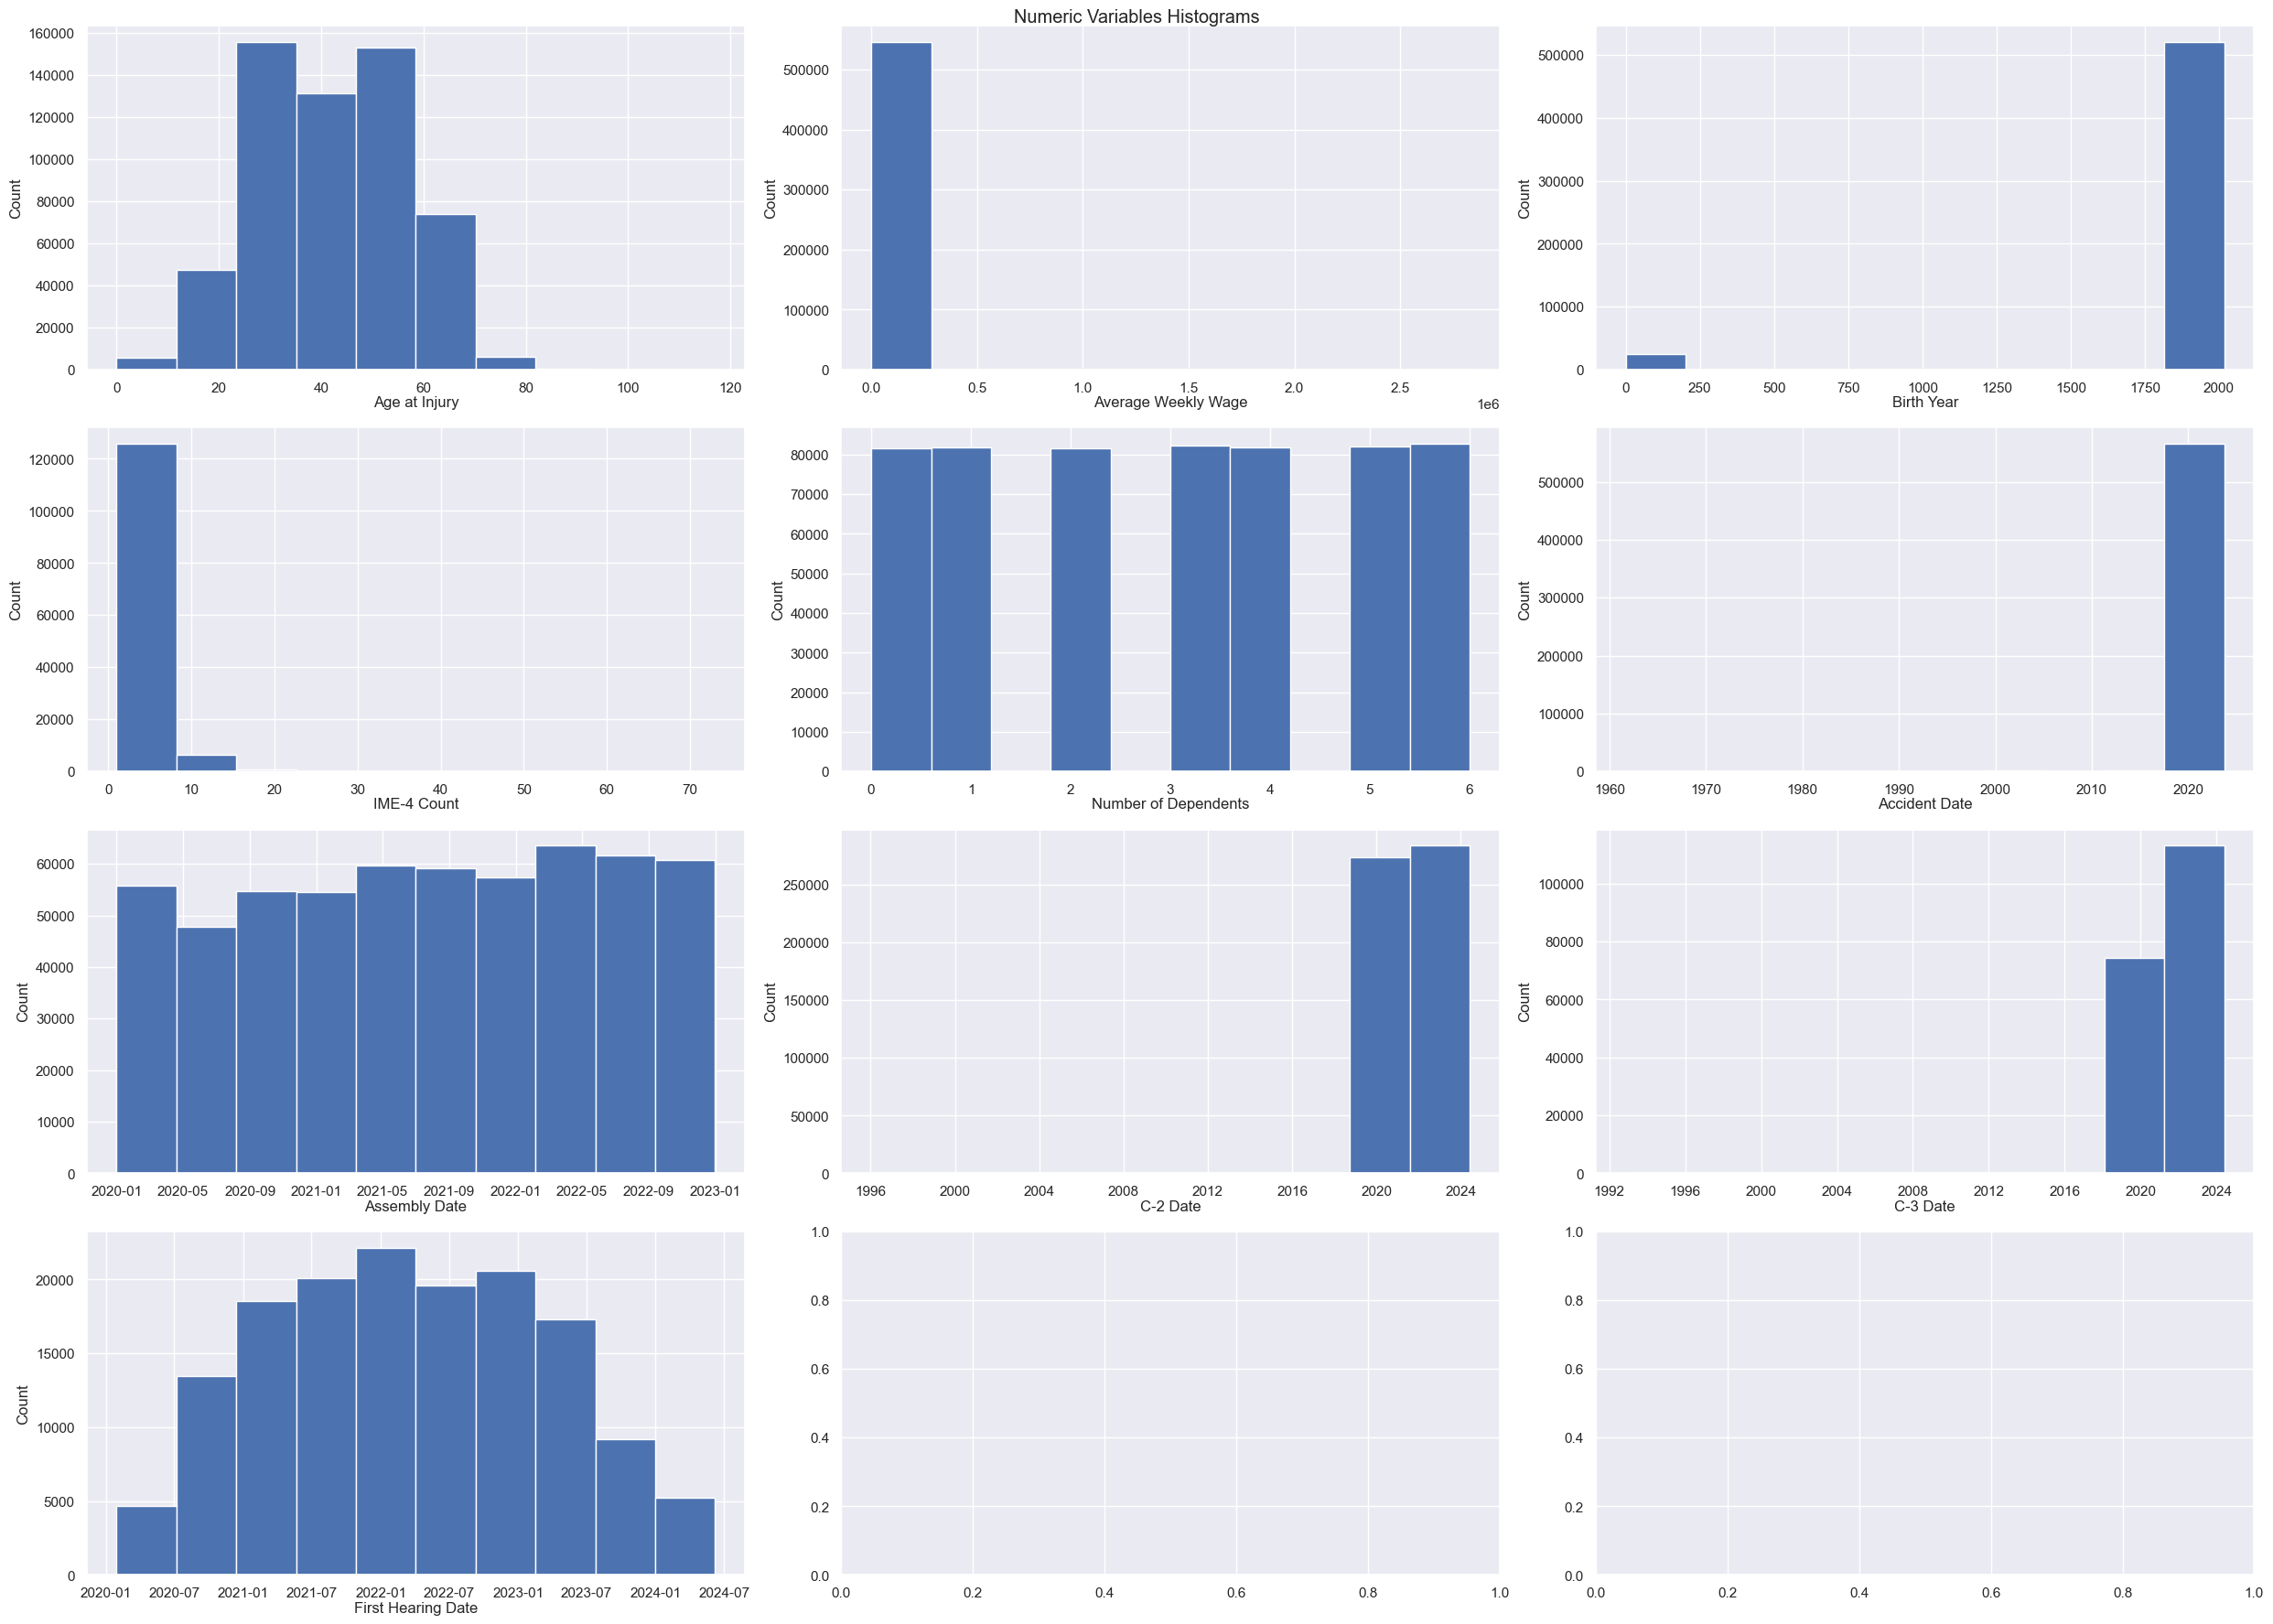

In [517]:
sns.set(font_scale=1)
fig, axes = plt.subplots(4, 3, figsize=(25, 18))

for ax, feat in zip(axes.flatten(), numerical_columns):
    ax.hist(train_data[feat])
    ax.set_title(feat, y=-0.13)
    ax.set_ylabel("Count")  # Set y-axis label to "Count" for each subplot

title = "Numeric Variables Histograms"
plt.suptitle(title)
plt.tight_layout()
plt.show()

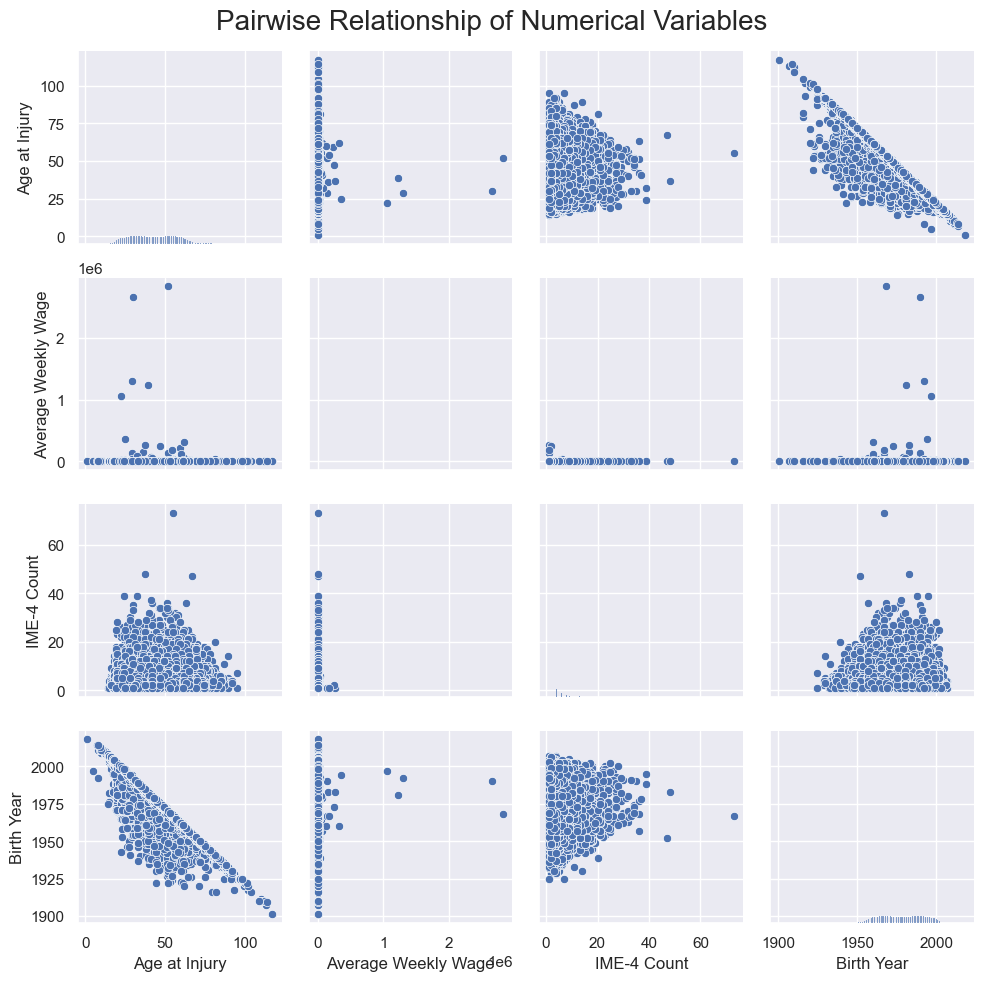

In [518]:
# Check relationships between variables with scatter plots

# Just for the scatter plot, filter out rows where 'Age at Injury' or 'Birth Year' is 0
filtered_data = train_data[(train_data["Age at Injury"] != 0) & (train_data["Birth Year"] != 0)]

#Selecting the variables thak make sense for scater plots
variables_to_plot= ['Age at Injury','Average Weekly Wage','IME-4 Count','Birth Year']

# Setting pairplot
sns.pairplot(filtered_data[variables_to_plot], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.tight_layout()
plt.show()

We can see that some variables appear to be related:

- Age at Injury and Birth Year: There is a strong negative correlation between these two variables. This is expected as older individuals were born earlier.
- Birth Year and Average Weekly Wage: Individuals born later in time tend to have higher average weekly wages.

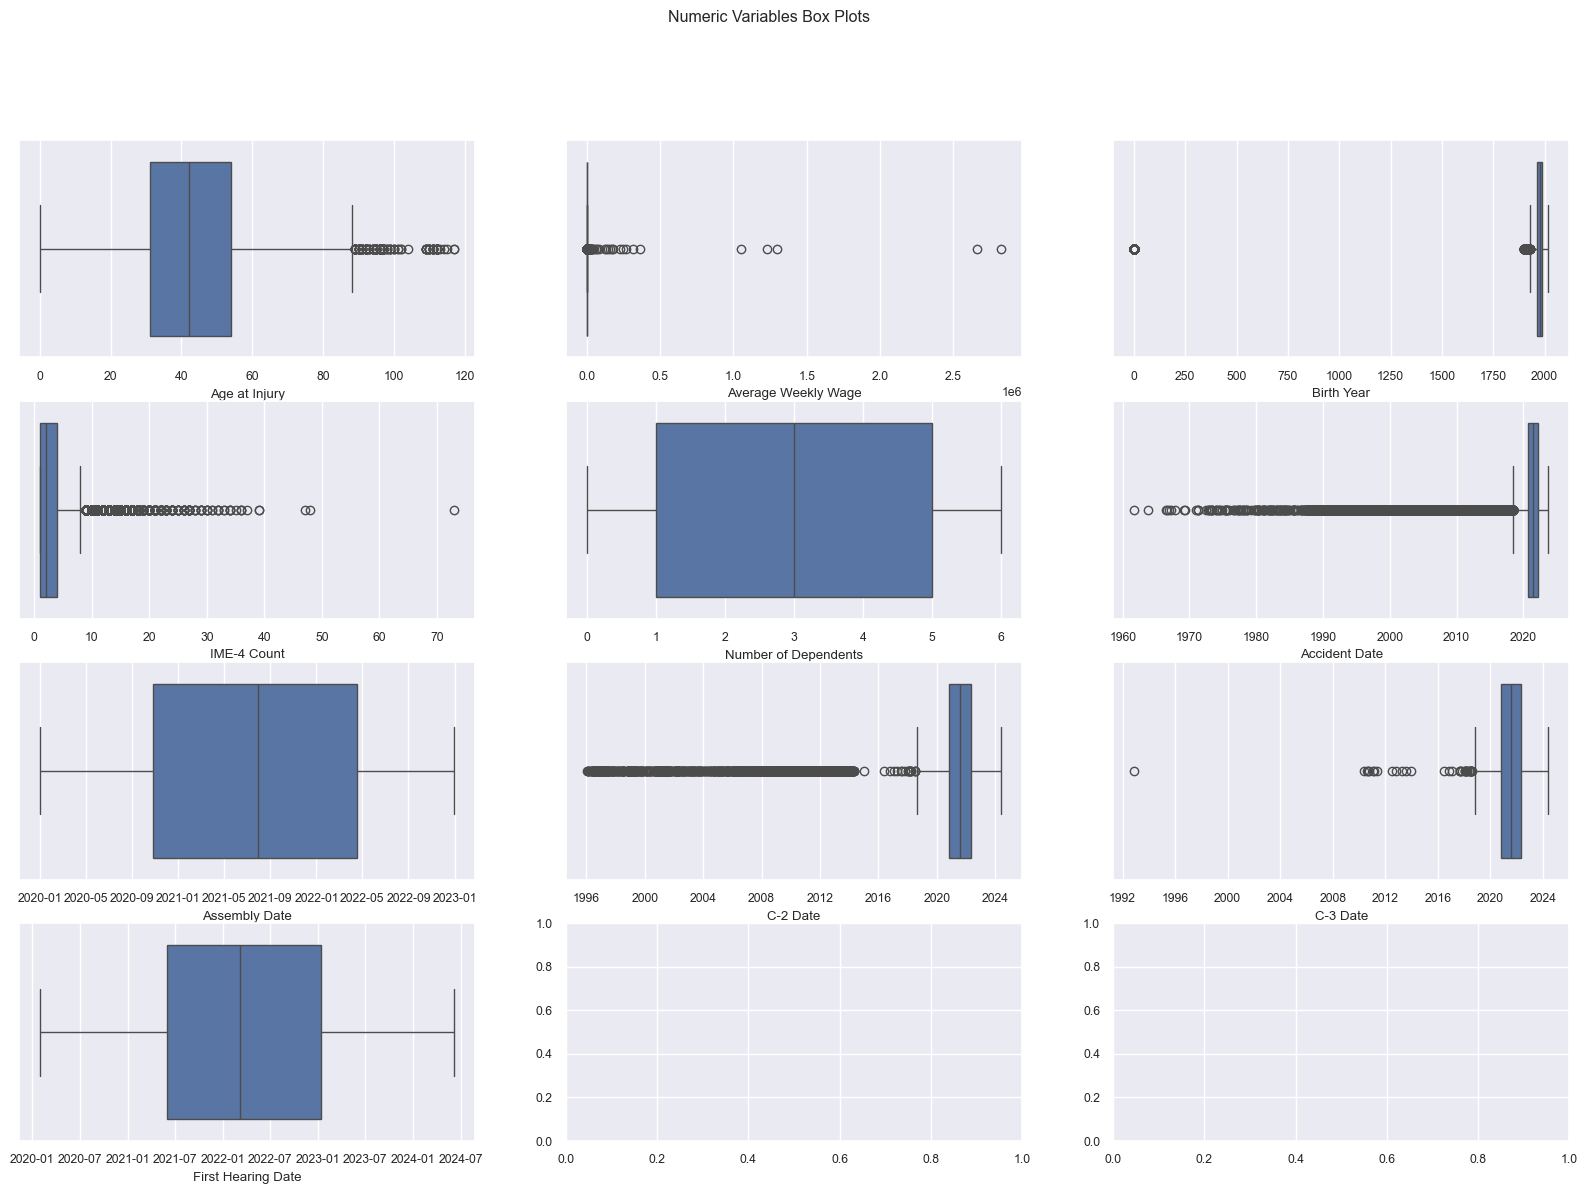

In [543]:
# Check for outliers with bloxplot visualization

sns.set(font_scale=0.8)

fig, axes = plt.subplots(4, 3, figsize=(20, 13))

for ax, feat in zip(axes.flatten(), numerical_columns): 
    sns.boxplot(x=train_data[feat], ax=ax)

title = "Numeric Variables Box Plots"
plt.suptitle(title)
plt.show()

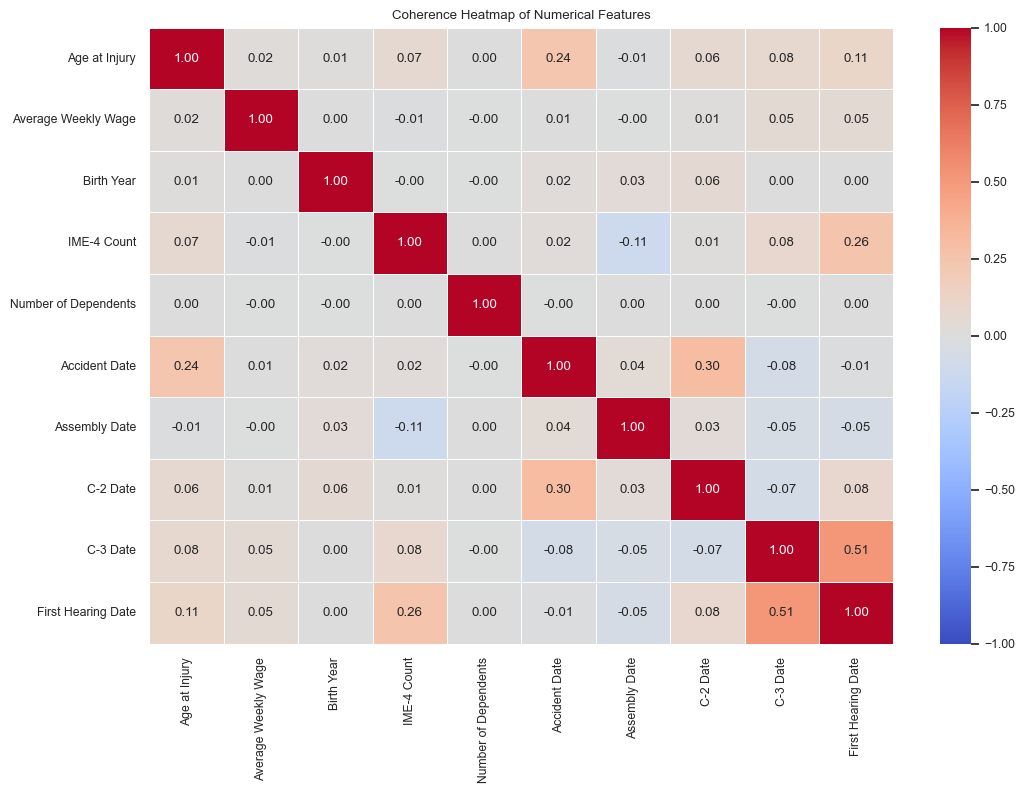

In [522]:
# Calculate correlation matrix
corr_matrix = train_data[numerical_columns].corr()

# Plot the coherence heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Coherence Heatmap of Numerical Features")
plt.show()

<a class="anchor" id="sub-section-4_3_2"></a>

### 4.3.2. Numerical Variables & Claim Injury Type

</a>

In [524]:
mean_values = train_data.groupby('Claim Injury Type')[numerical_columns].mean()
mean_values

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Date,Assembly Date,C-2 Date,C-3 Date,First Hearing Date
Claim Injury Type,,,,,,,,,,
1. CANCELLED,38.280699,7.832600,1778.005753,1.762431,2.998718,2020-04-21 17:08:55.096281856,2021-07-22 10:52:42.552099840,2021-07-29 11:34:09.384428544,2021-07-09 02:11:42.157247232,2022-01-08 19:09:14.603463936
2. NON-COMP,40.746391,2.866790,1880.803339,1.843903,3.009317,2021-05-24 16:13:24.531064576,2021-07-29 01:44:26.328612864,2021-07-27 21:48:34.266369536,2021-07-23 14:25:48.320088064,2021-12-09 07:27:02.161364992
3. MED ONLY,42.469916,480.101996,1909.129429,2.293845,2.997359,2021-07-09 15:50:31.738738432,2021-08-24 06:26:28.041679872,2021-08-28 03:13:35.360911616,2021-10-05 02:57:41.834654464,2022-06-13 04:10:48.742067712
4. TEMPORARY,43.590356,1124.643138,1895.209331,3.845354,3.005380,2021-03-26 01:06:25.701273088,2021-07-18 23:56:02.047580160,2021-06-27 17:52:43.161124608,2021-08-16 07:03:56.219515136,2022-03-21 19:42:53.158615296
5. PPD SCH LOSS,45.643351,1551.534581,1895.340431,2.383489,3.010128,2021-03-06 04:03:26.396023040,2021-04-21 10:55:47.075393536,2021-05-23 23:36:09.518639104,2021-05-18 01:46:54.703748608,2022-03-18 21:41:16.831889664
6. PPD NSL,48.030397,1252.683841,1879.555583,4.551000,2.989314,2021-01-03 10:37:04.459748096,2021-02-11 01:45:39.966753792,2021-02-17 06:58:13.137022208,2021-03-16 18:03:26.205250560,2021-12-15 07:00:06.035928064
7. PTD,53.412371,1384.602043,1861.680851,6.666667,2.876289,2020-07-23 12:51:57.525773312,2020-12-09 21:16:42.061855744,2020-12-24 22:15:00.000000000,2021-01-24 17:37:12.911392512,2021-09-04 18:33:24.123711232
8. DEATH,54.712766,1049.691151,1712.049774,2.425743,3.048936,2020-11-09 04:44:56.170212608,2021-03-19 13:56:25.531914752,2021-04-20 22:00:30.638298112,2021-05-10 18:22:58.723404288,2021-07-18 11:04:51.063830016


For more severe injury types (PTD, DEATH, PPD NSL, PPD SCH LOSS), the average age at injury is between 45 and 54 years old, while the others are between 38 and 43 years old. Higher wages seem to correspond with more severe or compensable injuries. There are inconsistencies in Birth Year. PTD claims have higher independent medical examinations on average high, compared to other claim types. The number of dependents seem consistent over all type of injury claims, i.e. between 2 and 3.

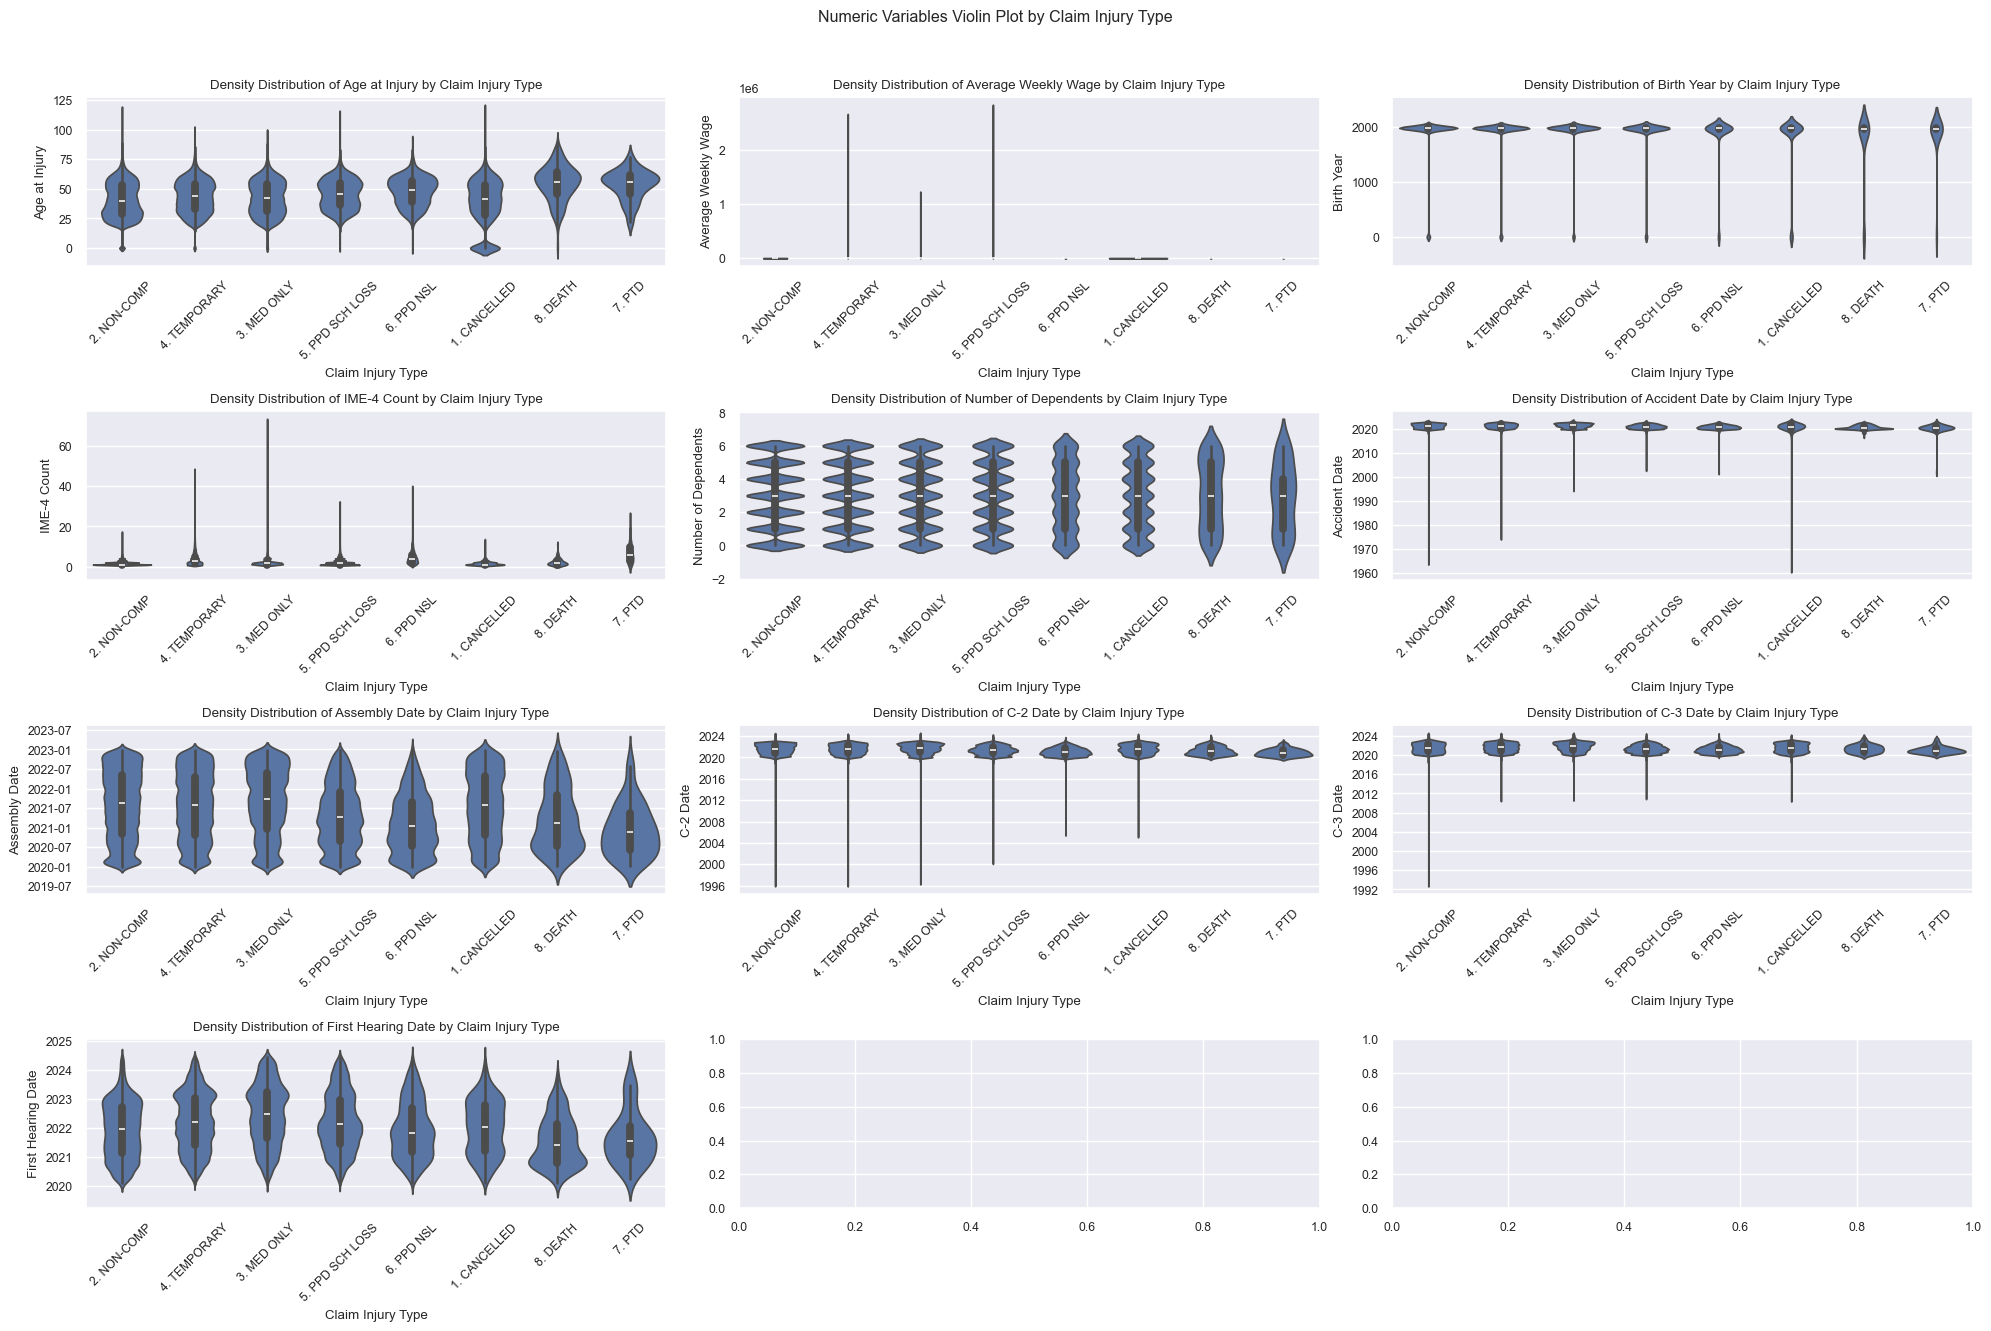

In [534]:
sns.set(font_scale=0.8)
fig, axes = plt.subplots(4, 3, figsize=(20, 13))

# Iterate over each subplot axis and each numerical column to create violin plots
for ax, feat in zip(axes.flatten(), numerical_columns): 
    sns.violinplot(data=train_data, x='Claim Injury Type', y=feat, ax=ax)
    ax.set_title(f"Density Distribution of {feat} by Claim Injury Type")
    ax.tick_params(axis='x', rotation=45)

fig.suptitle("Numeric Variables Violin Plot by Claim Injury Type", y=1.02)

plt.tight_layout()
plt.show()

DEATH and PTD have the highest age at injury medians, while CANCELLED and NON-COMP have the lowest. Extreme outliers present in Average Weekly Wage, specifically in MED ONLY, TEMPORARY and PPD SCH LOSS claim types. The number of dependents is relatively consistent across all claim types, with most distributions centered around 3 dependents.